# Capstone Project:
# Predictions of New Orleans Service Requests Processing Periods
##### Nadia Buksa, July 2022. BrainStation

![NOLA-311 banner](https://3l10v03y99ek1vmfpo1dltif-wpengine.netdna-ssl.com/wp-content/uploads/2020/06/Nola-home-header-7-SM-1024x320.png)

## Introduction

[NOLA-311](www.nola311.org) is New Orleans' primary source of local government information and non-emergency services. They provide services to all New Orelans residents and visitors 365 days a year, 24 hour a day, since 2012. 

>**The mission of NOLA-311 is to enable greater efficiency, accountability and transparency into non-emergency city services while maintaining the highest possible level of customer service.**

They provide the following services: <br>

![311 Sevice Request Types](https://3l10v03y99ek1vmfpo1dltif-wpengine.netdna-ssl.com/wp-content/uploads/2019/11/NOLA-311-services-updated.png)

[Source](https://nola311.org/)

## Business Problem Statement

**<center>Predict the number of days required to satisfy a service request.</center>**

**Why is it important?**<br>
We will find out shortly that the number of days required to satisfy a request may vary from a few days to a few years. There seem to be no clear patterns that would determine these metrics. As a resident or a visitor calling for service, this kind of delay may be highly frustrating. As per NOLA-311's mission statement, they highly value customer service.
<br>
With this level of ambiguity in terms of case resolution, it may be extremely challenging to allocate available resources. 

**What will be achieved if I am able to answer this question?**
1. Enhancement of customer satisfaction through setting accurate expectations.
2. Increased efficiency through well-planned resource allocation.

## Data Acquisition
<br>

[Open Data](https://data.gov/) has two data sets to offer:

1. A dataset that represents calls to the City of New Orleans' 311 Call Center, from their opening in 2012 to 12/28/2018. At the end of 2018, the call center moved to 24 hour operations with the Orleans Parish Communications District (OPCD). [**Source**](https://catalog.data.gov/dataset/311-calls-historic-data-2012-2018)

2. A dataset that represents calls to the Orleans Parish Communications District 311 Call Center and historical calls to the City of New Orleans' 311 Call Center. [**Source**](https://catalog.data.gov/dataset/311-opcd-calls-2012-present)

I have chosen the one that is the most recent and has more records in it, because I am hoping that with this data set my prediction would be most useful and up to date.

**Note:** My data set's cutoff day is May 10th, 2022, when I downloaded it as a csv file.

## Composition

This project consists of three notebooks including this one.

**Part 1** - Data Exploration, Cleaning, Merging, and more Cleaning

**Part 2** - Exploratory Data Analysis and Data Preparation

**Part 3** - Modeling, Analysis, and Conclusions

---

<center><h1> Part 1 </h1></center>

<center><h3> Data Cleaning & Merging </h3></center>

<h5>Goal:</h5> 

***Have a clean data set that is interpretable and transformable into data that is usable for modelling and analysis.***

---

# Table of Contents

>[**CHAPTER I**](#CHAPTER-I)

[Data Exploration](#Data-Exploration)


[Data Cleaning](#Data-Cleaning)

[Data Cleaning Summary](#Data-Cleaning-Summary)

[Exploratory Data Analysis](#Exploratory-Data-Analysis)

>[**CHAPTER II**](#CHAPTER-II)

- [Explore and compare the two data sets](#Explore-and-compare-the-two-data-sets)
- [Merge Data Sets](#Merge-Data-Sets)
    - [Outer Join Merge](#Outer-Join-Merge)
    - [Left Join Merge](#Left-Join-Merge)

 ---
 ---
 # CHAPTER I
 ---
 ---

## Data Exploration

In [5]:
# Import the libraries we will need for this report

# import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
#from scipy import stats
#from scipy.stats import norm
%matplotlib inline
#import plotly.express as px
# import plotly.graph_objects as go

In [6]:
# Load the data
df0 = pd.read_csv('311_OPCD_Calls__2012-Present_.csv')

C:\Users\nadia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
# Review the dataframe
df0.sample(5)

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Contractor,Contractor Action,RowID,X,Y,Longitude,Latitude,Location
39176,2021-774695,Trash/Recycling,Repair Trash Cart,05/10/2021 08:47:55 AM,10/19/2021 11:46:29 PM,05/17/2021 08:09:52 AM,Closed,Department of Sanitation,4214 St Peter St,A,Resolved,Richards Disposal,NaN,774695,3.671727e+06,540515.025803,-90.098623,29.980522,"(29.9805220891699, -90.09862331044893)"
451149,101000784924,Trash/Recycling,Report a Missed Trash/Recycling Pick Up,01/02/2019 01:30:15 AM,03/23/2020 09:59:21 PM,03/26/2018 07:00:00 PM,Closed,Department of Sanitation,7315 St Charles Ave NEW ORLEANS LOUISIANA 70118,NaN,NaN,NaN,NaN,391077,3.662687e+06,525079.394200,-90.127689,29.938344,"(29.9383438796, -90.1276891835)"
18030,2021-792362,Trash/Recycling,MIssed Recycling Pick-Up,06/29/2021 08:53:03 AM,07/14/2021 01:09:45 PM,07/14/2021 08:09:45 AM,Closed,Department of Sanitation,6011 Charlotte Dr,D,Resolved,Metro Disposal,NaN,792362,3.679974e+06,554581.931800,-90.072087,30.018954,"(30.018954149671103, -90.07208667171373)"
450972,101000785278,Abandoned Vehicles,Abandoned/Junk Vehicles,01/02/2019 01:30:15 AM,03/23/2020 09:59:21 PM,03/13/2018 07:00:00 PM,Closed,Department of Public Works,1001 Webster St NEW ORLEANS LOUISIANA 70118,NaN,NaN,NaN,NaN,391215,3.664411e+06,520096.977200,-90.122412,29.924594,"(29.9245938136, -90.1224122076)"
406650,101000491699,Abandoned Vehicles,Abandoned/Junk Vehicles,01/02/2019 10:29:53 AM,03/23/2020 09:59:26 PM,01/25/2016 06:00:00 PM,Closed,Department of Public Works,2526 N PRIEUR ST NEW ORLEANS LOUISIANA 70117,NaN,NaN,NaN,NaN,436276,3.687188e+06,539427.445500,-90.049829,29.977064,"(29.9770644654, -90.0498286529)"


In [8]:
df0.columns

Index(['Service Request #', 'Request Type', 'Request Reason', 'Date Created',
       'Date Modified', 'Date Closed', 'Request Status', 'Responsible Agency',
       'Address', 'Council District', 'Status', 'Contractor',
       'Contractor Action', 'RowID', 'X', 'Y', 'Longitude', 'Latitude',
       'Location'],
      dtype='object')

### Data Dictionary

|<center>**Column Name**</center>|<center>**Description**</center>|
|---------------------|-------------------------------------------------------------------------------------------------------|
|`Service Request #`  | A unique ticket number is that is allocated to each service request.                                   |
|`Request Type`       | When filing a request, customers are to specify one of the 12 request types.                          |
|`Request Reason`     | A short text field, perhaps to provide additional details about a request. These may be internal notes because the [online request form](https://nola311.org/service-request/) offers no opportunity to fill out this field as a user.|
|`Date Created`       | Date and time when a request was recieved.                                                             |
|`Date Modified`      | Date and time when a request was last worked on / updated.                                             |
|`Date Closed`        | Date and time when a request was closed / satisfied.                                                   |
|`Request Status`     | Has only two possible values: Pending or Closed                                                       |
|`Responsible Agency` | Specifies which Agency a request is allocated to. Some requests are being Referred / Outsourced.       |
|`Address`            | Address where service is required.                                                                     |
|`Council District`   | Council District that serviced address belongs to.                                                     |
|`Status`             | Analogus to `Request Status` and has a few additional categories to it (ex. 'Referred').               |
|`Contractor`         | Requests that are being referred or outsourced. May be tracking where the request was forwarded to.    |
|`Contractor Action`  | Tracks resolutions of the outsourced requests.                                                         |
|`RowID`              | Analogus to `Service Request #`. Only allocates a unique number to a row in the dataset rather than a service request.       |
|`X`                  | I was not able to determine the meaning of this column.                                                |
|`Y`                  | I was not able to determine the meaning of this column.                                               |
|`Longitude`          | Longitude of the address where service is required.                                                    | 
|`Latitude`           | Latitude of the address where service is required.                                                     |
|`Location`           | Longitude and Latitude combined.                                                                       |

<br>

***Note:*** Additional information about this dataset can be found [here](https://data.nola.gov/City-Administration/311-OPCD-Calls-2012-Present-/2jgv-pqrq). Metadata was not provided, and above are my own comments and interpretation.

**Observations**:<br>

1. `Longitude` and `Latitude` has some zero values, which will not show up on the list of missing values. This is to be explored further. `Location` combines `Longitude` and `Latitude`, which essentially creates a column that contains duplicate information. I will consider removing this column. 

2. It is not clear what `X` and `Y` represent, and there is no dataset description that would clarify it. I will remove those columns when cleaning the data.

3. I see no use for keeping `RowID` because I have `Service Request #`. I will check that all values in `Service Request #` are unique, and if so, will remove `RowID`.

4. I suspect that the following columns may duplicate each other:
- `Status` and `Request Status`
- `Request Type` and `Request Reason`

In [9]:
# Take a look at the shape of dataset
print(f'There are {df0.shape[0]} rows and {df0.shape[1]} columns in the dataset.')

There are 595097 rows and 19 columns in the dataset.


In [10]:
# Show data set info
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595097 entries, 0 to 595096
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Service Request #   595097 non-null  object 
 1   Request Type        593340 non-null  object 
 2   Request Reason      593318 non-null  object 
 3   Date Created        595097 non-null  object 
 4   Date Modified       595097 non-null  object 
 5   Date Closed         371378 non-null  object 
 6   Request Status      595097 non-null  object 
 7   Responsible Agency  588498 non-null  object 
 8   Address             582871 non-null  object 
 9   Council District    270120 non-null  object 
 10  Status              105002 non-null  object 
 11  Contractor          52601 non-null   object 
 12  Contractor Action   850 non-null     object 
 13  RowID               595097 non-null  int64  
 14  X                   558165 non-null  float64
 15  Y                   558165 non-nul

One of my suspected duplicate columns,`Status`, has a lot of null values, while `Request Status` does not seem to have null values. If these two columns are duplicates, I will only keep `Request Status`. I will take a closer look at all null values in "Missing values" section below.

In [11]:
# Show data metrics

print("The new dataset contains:")
print(f"{df0.shape[0]} rows and {df0.shape[1]} columns.")
print(f"{df0.isna().sum().sum()} null values, that is {round(df0.isna().sum().sum()/(df0.isna().sum().sum()+df0.notnull().sum().sum())*100, )}% of all dataset cells (not rows)")
print(f"{df0.duplicated().sum()} duplicated rows")

The new dataset contains:
595097 rows and 19 columns.
2271759 null values, that is 20% of all dataset cells (not rows)
0 duplicated rows


In [12]:
# Show % of missing values and where they are

na_table = df0.isna().mean().mul(100).round(2)
na_table[na_table > 0]

Request Type           0.30
Request Reason         0.30
Date Closed           37.59
Responsible Agency     1.11
Address                2.05
Council District      54.61
Status                82.36
Contractor            91.16
Contractor Action     99.86
X                      6.21
Y                      6.21
dtype: float64

In [13]:
# How many variables do I have in each of the present data types?

df0.dtypes.value_counts()

object     14
float64     4
int64       1
dtype: int64

---
---
**<center> End of Data Exploration </center>**

## Data Cleaning

***Data Cleaning To-Do List:***

- [Step 1.](#Data-Cleaning-Step-1) Remove unwanted columns<br><br>
    - Check if `Service Request #` has duplicate values and if not, remove `RowID`<br>
    - Check if the following columns may duplicate each other and if so, remove one of them:<br>
        - `Status` and `Request Status`<br>
        - `Request Type` and `Request Reason`<br>
    - Remove `X`, `Y`<br>
    <br>
- [Step 2.](#Data-Cleaning-Step-2) Check for duplicate rows, and remove duplicates<br>
<br>
- [Step 3.](#Data-Cleaning-Step-3) Check for missing values<br><br>
    - See if there are empty rows, and if so - remove them<br>
    - Check for null values in each column and deal with each null-containing column appropriately<br>
        - [`Status`](#Status)<br>
        - [`Council District`](#Council-District)<br>
        - [`Date Closed`](#Date-Closed)<br>
        - [Remaining Missing Values](#Remaining-Missing-Values)<br>
    <br>
- [Step 4.](#Data-Cleaning-Step-4) Check all categorical columns and see if:<br><br>
    - categories need to be condensed<br>
    - columns need to converted into a different date type<br><br>
        - [`Service Request #`](#Service-Request-#)<br>
        - [`Request Type`](#Request-Type)<br>
        - [`Request Reason`](#Request-Reason)<br><br>
- [Step 5.](#Data-Cleaning-Step-5) Explore zero values in `Longitude` and `Latitude`<br><br>

## Data Cleaning Step 1

### Unwanted Columns

In [14]:
# Check if 'Service Request #' has duplicate values

df0['Service Request #'].is_unique

True

From the above we can conclude that `Service Request #` has no duplicates in it. It is a very useful column, and `RowID` is not needed.

In [15]:
# Check if 'Status' and 'Request Status' duplicate each other and if so, remove one of them

# Step 1 - inspect 'Status' column

df0['Status'].value_counts(dropna = False)

NaN                                              490095
Resolved                                          50077
Pending                                           27746
Assigned to Contractor                             9817
Inspected                                          5856
Duplicate Case                                     4114
Referred to Code Enforcement                       1909
Invalid Case                                       1804
Referred to External Agency                        1373
Reviewed                                           1033
Duplicate Request                                   276
Unfounded                                           136
Referred to Property Owner                          127
Not Enough Information- Resubmittal Required        125
Captured by Project                                 117
Wrong Agency                                         84
Invalid Request                                      66
Canceled By Citizen                             

In [16]:
# Step 2 - inspect 'Request Status' column
df0['Request Status'].value_counts(dropna = False) 

Closed     518826
Pending     76271
Name: Request Status, dtype: int64

`Status` is a lot more informative, but it also has a significant amount of missing values, while `Request Status` has no null values, but it only offers two categories. Conclusion: Keep `Status` and clean it, keep `Request Status` and convert it to a binary column.

In [17]:
# Check if 'Request Type' and 'Request Reason' duplicate each other and if so, remove one of them

# Step 1 - inspect 'Request Type' column

df0['Request Type'].value_counts(dropna = False)

Trash/Recycling                                235887
Roads/Drainage                                  77145
Traffic Signals/Signs/Striping/Streetlights     75376
Property Maintenance                            70955
Abandoned Vehicles                              58202
Parks & Parkways                                22992
Tax and Revenue                                 12087
Taxi Issues                                      9439
Mosquito, Termite & Rodent Control               9095
COVID-19                                         6939
Safety & Permits                                 6017
General Services                                 3768
Health Related Questions                         3750
NaN                                              1757
Mayor's Request                                   818
EMS                                               663
Law Enforcement Services                          147
Hard Rock Hotel Collapse                           60
Name: Request Type, dtype: i

In [18]:
# Step 2 - inspect 'Request Reason' column
df0['Request Reason'].value_counts(dropna = False) 

Property Maintenance               71014
Request a Large Item Pick Up       60484
Abandoned/Junk Vehicles            56713
Street Light Outage/Malfunction    47514
Order Recycling Cart               36710
                                   ...  
Translation Line                       2
Mud covering the street                2
Oak tree blocking water line           1
Collapsed Structure                    1
Tree roots                             1
Name: Request Reason, Length: 121, dtype: int64

None of these two columns contain null values. `Request Type` appears to be a cleaner list of categories, while `Request Reason` would need to be cleaned and inspected further in order to be comparable to another column. Conclusion: will leave both columns, and need to condense and/or clean categories in `Request Reason`, then come back and compare the two categories again. `Request Reason` contains 121 categories. One option is to cut the tail of bottom 5% categories that contain less that N number of instances and place them in a generic column ('other'). A more tidy process would require going through 121 categories and trying to organize them into broader groups. The risk is that I may replicate `Request Type`, but a potential benefit is that I may gain more granularity. 

In [19]:
# Remove unwanted columns, and create a working df to keep df0 as a backup 

df = df0.drop(columns = ['X', 'Y', 'RowID', 'Location'])

## Data Cleaning Step 2
[(back to list)](#Data-Cleaning)

### Duplicates

In [20]:
df.duplicated().sum()

0

My data set does not have any duplicates, so I am moving onto the next section.

## Data Cleaning Step 3 
[(back to list)](#Data-Cleaning)

### Missing Values

In [21]:
#Check the total number of rows before dropping empties, so that I know how many empty rows I have removed

df.shape

(595097, 15)

In [22]:
# See if there are empty rows, and if so - remove them

df.dropna(how = 'all').shape

(595097, 15)

My dataframe shape is the same before and after dropping empty rows, so we can conclude that the data set had no empty rows. 

In [23]:
# Find the total number of missing values

print(f" Given data set contains {df.isna().sum().sum()} missing values")

 Given data set contains 2197895 missing values


In [24]:
# Find out which columns contain missing values

df.isna().sum()

Service Request #          0
Request Type            1757
Request Reason          1779
Date Created               0
Date Modified              0
Date Closed           223719
Request Status             0
Responsible Agency      6599
Address                12226
Council District      324977
Status                490095
Contractor            542496
Contractor Action     594247
Longitude                  0
Latitude                   0
dtype: int64

In [25]:
# Show me only those columns that have missing values in it
na_table = df.isna().sum()
na_table[na_table > 0]

Request Type            1757
Request Reason          1779
Date Closed           223719
Responsible Agency      6599
Address                12226
Council District      324977
Status                490095
Contractor            542496
Contractor Action     594247
dtype: int64

In [26]:
# Show % of missing values in each column

na_table = df.isna().mean().mul(100).round(2)
na_table[na_table > 0]

Request Type           0.30
Request Reason         0.30
Date Closed           37.59
Responsible Agency     1.11
Address                2.05
Council District      54.61
Status                82.36
Contractor            91.16
Contractor Action     99.86
dtype: float64

Action plan:

- 1. Remove columns `Contractor Action` and `Contractor`, as they are mostly empty

- 2. Move from the highest number of NANs to the lowest, inspecting each column

In [27]:
# Remove columns 'Contractor Action' and 'Contractor'

df.drop(columns = ['Contractor Action','Contractor'], inplace = True)

In [28]:
df.head(1)

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Longitude,Latitude
0,2019-631621,NaN,NaN,11/06/2019 03:32:28 PM,11/06/2019 03:32:28 PM,NaN,Pending,NaN,NaN,NaN,NaN,0.0,0.0


### `Status`
[(back to list)](#Data-Cleaning)

In [29]:
missing_Status = df['Status'].isna().sum()
total_Status = df.shape[0]
print(f'Percentage of Status rows affected by missing data: {round(missing_Status/total_Status*100,2)}%.\
This is the highest number of missing values, so I will start with  this column.')

Percentage of Status rows affected by missing data: 82.36%.This is the highest number of missing values, so I will start with  this column.


In [30]:
df['Status'].value_counts(dropna = False)

NaN                                              490095
Resolved                                          50077
Pending                                           27746
Assigned to Contractor                             9817
Inspected                                          5856
Duplicate Case                                     4114
Referred to Code Enforcement                       1909
Invalid Case                                       1804
Referred to External Agency                        1373
Reviewed                                           1033
Duplicate Request                                   276
Unfounded                                           136
Referred to Property Owner                          127
Not Enough Information- Resubmittal Required        125
Captured by Project                                 117
Wrong Agency                                         84
Invalid Request                                      66
Canceled By Citizen                             

Step 1: Remove records of duplicate and cancelled requests.

In [31]:
# Drop rows that have the following 'Request Status': 

# - 'Duplicate Case'
# - 'Duplicate Request'
# - 'Canceled By Citizen'
# - 'Duplicate'
# - 'Canceled by citizen'
# - 'Invalid Case'
# - 'Invalid Request'
# - 'Resubmittal Required'
df = df[
    (df['Status'] != 'Duplicate') & (df['Status'] != 'Duplicate Case') & (df['Status'] != 'Duplicate Request') & \
    (df['Status'] != 'Canceled By Citizen') & (df['Status'] != 'Canceled by citizen') & (df['Status'] != 'Invalid Case') &\
    (df['Status'] != 'Invalid Request') & (df['Status'] != 'Resubmittal Required')]

Step 2: Condense categories. Merge those that have common grounds to be merged. Merge those that have no common ground and less than 200 instances each into one category called `Other`. Do not merge `Pending` and `Closed` as I will use it in step 3.

In [32]:
df['Status'].value_counts(dropna = False)

NaN                                              490095
Resolved                                          50077
Pending                                           27746
Assigned to Contractor                             9817
Inspected                                          5856
Referred to Code Enforcement                       1909
Referred to External Agency                        1373
Reviewed                                           1033
Unfounded                                           136
Referred to Property Owner                          127
Not Enough Information- Resubmittal Required        125
Captured by Project                                 117
Wrong Agency                                         84
Closed                                               51
Question Answered.                                   47
Referred                                             31
Referred to Risk Management                          27
Reopen                                          

In [33]:
df['Status'] = df['Status'].map({
    'Resolved': 'Resolved',
    'Pending': 'Pending',
    'Assigned to Contractor': 'Assigned to Contractor',
    'Inspected': 'Inspected',
    'Referred to Code Enforcement': 'Referred',
    'Invalid Case': 'Invalid Case',
    'Referred to External Agency': 'Referred',
    'Reviewed' : 'Reviewed',
    'Unfounded' : 'Other',
    'Referred to Property Owner' : 'Referred',
    'Not Enough Information- Resubmittal Required' : 'Resubmittal Required',
    'Captured by Project' : 'Other',
    'Wrong Agency' : 'Other',
    'Invalid Request' : 'Resubmittal Required',
    'Closed' : 'Closed',
    'Question Answered.' : 'Resolved',
    'Referred' : 'Referred',
    'Referred to Risk Management' : 'Referred',
    'Question Answered' : 'Resolved',
    'Reopen' : 'Other',
    'Stump' : 'Other',
    'Site Visit Conducted' : 'Inspected',
    'Not Enough Information - Resubmittal Required' : 'Resubmittal Required',
    'Scheduled' : 'Other',
    'Need Further Information from Resident' : 'Other',
    'inspected' : 'Inspected',
    'Question answered' : 'Resolved',
    'Reported' : 'Other',
    'Referred to Code Enforcement' : 'Referred'
})

In [34]:
#Check what's left

df['Status'].value_counts(dropna = False)

NaN                       490096
Resolved                   50152
Pending                    27746
Assigned to Contractor      9817
Inspected                   5873
Referred                    3467
Reviewed                    1033
Other                        396
Resubmittal Required         139
Closed                        51
Name: Status, dtype: int64

Step 3: Remaining NaN values I will replace with `Closed` or `Pending` based on `Request Status` input.

In [35]:
# Fulfill NaN values with 'CLOSED' based on 'Request Status'

df['Status'] = np.where((df['Status'].isna()) & (df['Request Status'] == 'Closed'), 'Closed', df['Status'])

In [36]:
# Fulfill NaN values with 'PENDING' based on 'Request Status'

df['Status'] = np.where((df['Status'].isna()) & (df['Request Status'] == 'Pending'), 'Pending', df['Status'])

In [37]:
# Check progress

df['Status'].value_counts(dropna = False)

Closed                    454106
Pending                    63787
Resolved                   50152
Assigned to Contractor      9817
Inspected                   5873
Referred                    3467
Reviewed                    1033
Other                        396
Resubmittal Required         139
Name: Status, dtype: int64

There are no more null values in `Status` column. Check what's next.

In [38]:
# Show % of missing values in each column

na_table = df.isna().mean().mul(100).round(2)
na_table[na_table > 0]

Request Type           0.30
Request Reason         0.30
Date Closed           37.99
Responsible Agency     1.12
Address                2.07
Council District      55.18
dtype: float64

### `Council District`
[(back to list)](#Data-Cleaning)

In [39]:
missing_Status = df['Council District'].isna().sum()
total_Status = df.shape[0]
print(f'Percentage of Council District rows affected by missing data: {round(missing_Status/total_Status*100,2)}%')

Percentage of Council District rows affected by missing data: 55.18%


In [40]:
df['Council District'].value_counts(dropna = False)

NaN    324902
B       63775
A       59737
D       58257
C       45128
E       36971
Name: Council District, dtype: int64

In [41]:
df[df['Council District'].isna()].head(3)

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Longitude,Latitude
0,2019-631621,NaN,NaN,11/06/2019 03:32:28 PM,11/06/2019 03:32:28 PM,NaN,Pending,NaN,NaN,NaN,Pending,0.0,0.0
10,2021-782986,Safety & Permits,Safety & Permits Request (Cyber Incident Back Up),06/04/2021 05:18:25 PM,06/23/2021 10:11:20 AM,06/23/2021 05:11:20 AM,Closed,Safety and Permits,NaN,NaN,Resolved,0.0,0.0
12,2019-629157,NaN,NaN,10/26/2019 05:49:42 AM,10/26/2019 05:49:42 AM,NaN,Pending,NaN,NaN,NaN,Pending,0.0,0.0


I will look up those addresses in my data frame that have zip codes,  and based on the zip code, I will fulfill the missing value in `Council District`. 

Those columns that are missing both `Address` and `Council District` are not possible to fulfill based on their zip code, so I will replace those missing values with `Unknown`

In [42]:
df['Council District'] = np.where(
    (df['Council District'].isna()) & (df['Address'].isna()), 'Unknown', df['Council District']
)

In [43]:
# See how the total number of missing values has changed
df['Council District'].isna().sum()

312712

![New Orleans District Map](https://bloximages.newyork1.vip.townnews.com/nola.com/content/tncms/assets/v3/editorial/8/22/822cd734-a575-11ec-8b8f-cb07801ef622/62325fd1e3f53.image.jpg?resize=1000%2C967)

Image [Source](https://www.nola.com/news/politics/article_f39bc8c4-a572-11ec-bea3-87f19db52df8.html)

![New Orleans zip code map](https://www.datacenterresearch.org/a/wp-content/uploads/2014/02/ZIP_code_map.png)

Image [Source](https://www.datacenterresearch.org/maps/reference-maps/#gallery-4)

In [44]:
# Bring up the total number of nulls again, for easy comparison after some of the values are expected to be fulfilled
print(f" Total number of missing values in column 'Council District' is {df['Council District'].isna().sum()}.")

 Total number of missing values in column 'Council District' is 312712.


It appears that the same zip code is associated with two different `Council Districts`. I will leave the existing data as is, and fulfull the missing data based on the combination of two maps: New Orleans zip codes and Districts. I will be using `Address` to look up zip codes. 

After visual inspection of both maps, we can conclude that  zipcodes have minor discrepancy with the district maps. Certain Zip code areas boundaries had to be clarified. For this purpose I used an additional map: Additional map [Source].(https://koordinates.com/layer/103276-new-orleans-city-council-districts/)

Note: zip code 70124 area belongs to Disctrict A, except for Lakeshore area, which belongs to district D. For this reason, I address area before looking at zip codes.


In [45]:
df['Council District'] = np.where(
        (df['Address'].notnull()) & (df['Address'].str.contains('Lakeshore', regex=False)) & \
        (df['Council District'].isna()), 'D', df['Council District']
)

In [46]:
# Check how/if the total number of missing values has changed
df['Council District'].isna().sum()

312662

In [47]:
district_A = ['70118', 
             '70113',
             '70124',
             '70117',
             '70126'
            ]

for A in district_A:

    df['Council District'] = np.where(
        (df['Address'].notnull()) & (df['Address'].str.contains(A, regex=False)) & \
        (df['Council District'].isna()), 'A', df['Council District']
)

In [48]:
district_B = ['70125', 
             '70115', 
             '70130',
             '70119'
             ]

for B in district_B:

    df['Council District'] = np.where(
        (df['Address'].notnull()) & (df['Address'].str.contains(B, regex=False)) & \
        (df['Council District'].isna()), 'B', df['Council District']
)

In [49]:
district_C = ['70112', 
             '70116', 
             '70114', 
             '70131',
             '70117'
            ]

for C in district_C:

    df['Council District'] = np.where(
        (df['Address'].notnull()) & (df['Address'].str.contains(C, regex=False)) & \
        (df['Council District'].isna()), 'C', df['Council District']
)

In [50]:
district_D = ['70122',
             '70148'
            ]

for D in district_D:

    df['Council District'] = np.where(
        (df['Address'].notnull()) & (df['Address'].str.contains(D, regex=False)) & \
        (df['Council District'].isna()), 'D', df['Council District']
)

In [51]:
district_E = ['70127',
             '70128',
             '70032',
             '70043',
             '70129',
             '70075',
             '70092',
             '70126'
            ]

for E in district_E:

    df['Council District'] = np.where(
        (df['Address'].notnull()) & (df['Address'].str.contains(E, regex=False)) & \
        (df['Council District'].isna()), 'E', df['Council District']
)

In [52]:
# See how the total number of missing values has changed
df['Council District'].isna().sum()

24465

In [53]:
missing_Status = df['Council District'].isna().sum()
total_Status = df.shape[0]
print(f'Percentage of Council District rows affected by missing data: {round(missing_Status/total_Status*100,2)}%')

Percentage of Council District rows affected by missing data: 4.16%


Let's see if we have the same amount of rows with missing `Address`:

In [54]:
missing_address = df['Address'].isna().sum()
total_address = df.shape[0]
print(f"Percentage of 'Address' rows affected by missing data: {round(missing_address/total_address*100,2)}%.")

Percentage of 'Address' rows affected by missing data: 2.07%.


In [55]:
# print(f"Conclusion: 'Address' has {round((round(missing_council_district/total_council_district*100,2))-(round(missing_address/total_address*100,2)),2)}% of addresses with no zip code.")

Remaining number of null values in `Council District` I will replace with 'Unknown'.

In [56]:
df['Council District'] = np.where(df['Council District'].isna(), 'Unknown', df['Council District'])

In [57]:
missing_council_district = df['Council District'].isna().sum()
total_council_district = df.shape[0]
print(f"Remaining percentage of 'Council District' rows affected by missing data: {round(missing_council_district/total_council_district*100,2)}%")

Remaining percentage of 'Council District' rows affected by missing data: 0.0%


In [58]:
# Show % of the reminader of missing values in each column

na_table = df.isna().mean().mul(100).round(2)
na_table[na_table > 0]

Request Type           0.30
Request Reason         0.30
Date Closed           37.99
Responsible Agency     1.12
Address                2.07
dtype: float64

### `Date Closed`
[(back to list)](#Data-Cleaning)

In [59]:
missing_date_closed = df['Date Closed'].isna().sum()
total_date_closed = df.shape[0]
print(f"Percentage of 'Date Closed' rows affected by missing data: {round(missing_date_closed/total_date_closed*100,2)}%")

Percentage of 'Date Closed' rows affected by missing data: 37.99%


In [60]:
df['Date Closed'].value_counts(dropna = False)

NaN                       223685
10/15/2013 07:00:00 PM      1640
11/07/2012 06:00:00 PM      1346
02/24/2013 06:00:00 PM      1222
10/22/2013 07:00:00 PM      1011
                           ...  
07/30/2021 05:57:06 AM         1
08/03/2021 05:45:11 AM         1
07/20/2021 01:32:13 AM         1
09/20/2021 06:45:39 AM         1
10/06/2021 04:17:52 AM         1
Name: Date Closed, Length: 58779, dtype: int64

Assumption: `Date Closed` = `Date Modified`

Check if this is true:

In [61]:
# Have a look at the two columns side by side

subset_dates = df[['Date Closed', 'Date Modified']]
subset_dates.sample()

,Date Closed,Date Modified
116874,NaN,05/20/2021 09:54:23 AM


In [62]:
# Remove rows if either of the columns contains null values because we won't be able to do a comparison in those cases
subset_dates = df[['Date Closed', 'Date Modified']].copy()
subset_dates.dropna(how='any', inplace=True)

In [63]:
# I am only interested in comparing the date
# If the dates are the same, I would not worry about the time if it's different
# Split both columns and only pull out the date, not the time:

subset_dates['Date Closed'] = subset_dates['Date Closed'].str.split(' ').str[0]
subset_dates['Date Modified'] = subset_dates['Date Modified'].str.split(' ').str[0]

In [64]:
# What is the % of all non-null values where 'Date Closed' = 'Date Modified'
print(f"'Date Closed' = 'Date Modified' is true for \
{round((subset_dates['Date Closed'] == subset_dates['Date Modified']).mean() * 100,2)}% of all non-null records.")

'Date Closed' = 'Date Modified' is true for 11.47% of all non-null records.


This is too low.

**Conclusion:**
1. Reject the assumption
2. Try fulfilling the missing dates for all closed cases
3. Leave nulls as is for the pending cases

In [65]:
# Step 1: Inspect the rows affected by nulls

df[df['Date Closed'].isna()]

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Longitude,Latitude
0,2019-631621,NaN,NaN,11/06/2019 03:32:28 PM,11/06/2019 03:32:28 PM,NaN,Pending,NaN,NaN,Unknown,Pending,0.000000,0.000000
1,2021-830021,COVID-19,COVID-19 Business Non-Compliance,10/05/2021 09:40:15 PM,10/05/2021 09:40:16 PM,NaN,Pending,Safety and Permits,823 Fulton St,B,Pending,-90.065412,29.943975
5,2021-845875,Trash/Recycling,Order Trash Cart,12/04/2021 01:38:45 AM,12/04/2021 02:00:17 AM,NaN,Pending,Department of Sanitation,2511 Touro St,D,Assigned to Contractor,-90.060264,29.982905
6,2021-845874,Traffic Signals/Signs/Striping/Streetlights,Street Light Outage/Malfunction,12/04/2021 12:02:10 AM,12/04/2021 12:02:10 AM,NaN,Pending,Department of Public Works,5918 General Haig St,A,Pending,-90.102537,29.997292
7,2021-845942,Traffic Signals/Signs/Striping/Streetlights,Street Light Outage/Malfunction,12/04/2021 10:13:42 PM,12/04/2021 10:13:42 PM,NaN,Pending,Department of Public Works,2613 Soniat St,B,Pending,-90.109076,29.938177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595092,2020-650941,Trash/Recycling,Request a Large Item Pick Up,03/11/2020 12:20:55 PM,03/18/2021 09:57:49 AM,NaN,Closed,Department of Sanitation,1300 Perdido St,B,Closed,-90.077009,29.952028
595093,2019-634568,Abandoned Vehicles,Abandoned/Junk Vehicles,11/25/2019 11:36:29 AM,03/23/2020 09:59:15 PM,NaN,Closed,Department of Public Works,2645 Ridgeway Blvd,E,Closed,-89.866726,30.124741
595094,2020-639288,Traffic Signals/Signs/Striping/Streetlights,Street Light Outage/Malfunction,01/02/2020 09:26:08 AM,03/23/2020 09:59:15 PM,NaN,Closed,Department of Public Works,7001 Lawrence Rd,E,Closed,-89.994828,30.030684
595095,2019-620683,EMS,EMS Lost & Found,09/15/2019 12:51:26 PM,03/23/2020 09:59:16 PM,NaN,Closed,Emergency Medical Services,7001 Lawrence Rd,E,Closed,-89.994828,30.030684


In [66]:
# How many missing values by request status?

df.loc[df['Date Closed'].isna(), 'Request Status'].value_counts()

Closed     148243
Pending     75442
Name: Request Status, dtype: int64

In [67]:
# Fill in the values where there is no Date Closed (and status == Closed), replace with Date Modified

df['Date Closed'] = np.where((df['Date Closed'].isna()) & (df['Request Status'] == 'Closed'), \
                             df['Date Modified'], df['Date Closed'])

In [68]:
# Check my work:
df.loc[df['Date Closed'].isna(), 'Request Status'].value_counts()

Pending    75442
Name: Request Status, dtype: int64

In [69]:
# Is this how many Pending cases I have?
df['Request Status'].value_counts()

Closed     512500
Pending     76270
Name: Request Status, dtype: int64

It looks like I may have rows with `Date Closed` filled in, but `Request Status` still 'Pending'. Lets see if that's true.

In [70]:
# Show rows where 'Date Closed' is not empty, and 'Request Status' - 'Pending'

df[(df['Date Closed'].notnull()) & (df['Request Status'] == 'Pending')]

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Longitude,Latitude
100,2019-565336,NaN,NaN,02/05/2019 01:29:14 PM,02/05/2019 02:12:02 PM,02/05/2019 06:12:02 AM,Pending,NaN,NaN,Unknown,Pending,0.000000,0.000000
200,2019-558638,NaN,NaN,01/04/2019 12:48:30 PM,01/15/2019 02:36:50 PM,01/15/2019 06:36:50 AM,Pending,NaN,NaN,Unknown,Pending,0.000000,0.000000
433,2021-782525,Roads/Drainage,Service Cut,06/03/2021 03:49:09 PM,10/19/2021 05:05:42 PM,11/12/2019 06:00:00 PM,Pending,Department of Public Works,CURRAN BLVD & LUCERNE ST,E,Inspected,-89.974757,30.049968
858,2021-827379,Roads/Drainage,Catch Basin - Broken/Damage,09/29/2021 10:20:18 AM,10/19/2021 07:25:00 PM,08/03/2021 07:00:00 PM,Pending,Department of Public Works,829 Sister St,E,Inspected,-90.027063,29.961186
927,2019-584293,NaN,NaN,05/02/2019 12:40:54 PM,05/14/2019 02:01:12 PM,05/14/2019 07:01:12 AM,Pending,NaN,NaN,Unknown,Pending,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286250,2019-559128,Roads/Drainage,Pothole,01/07/2019 01:25:51 PM,12/29/2020 10:27:49 AM,12/16/2020 06:00:00 PM,Pending,Department of Public Works,4334 Stemway Dr,D,Pending,-90.017904,30.010995
287132,2019-558158,Roads/Drainage,Street Subsidence (Sinking),01/03/2019 10:24:49 AM,01/11/2021 02:42:18 PM,09/24/2020 07:00:00 PM,Pending,Department of Public Works,2718 Ideal Pl,D,Pending,-90.049510,29.984743
330923,2019-513551,Roads/Drainage,Street Flooding / Drainage,01/02/2019 02:28:31 PM,02/12/2021 11:29:35 AM,08/03/2020 07:00:00 PM,Pending,Department of Public Works,5212 Pasteur Blvd,D,Pending,-90.062921,30.011501
330926,2019-513546,Traffic Signals/Signs/Striping/Streetlights,Road Surface Marking Maintenance-Bike Lane,01/02/2019 02:19:31 PM,09/14/2020 09:42:56 AM,05/14/2020 07:00:00 PM,Pending,Department of Public Works,700 BLK Decatur St,C,Pending,-90.062423,29.957132


In [71]:
# How many "Pending" requests with closed date do I have?

len(df[(df['Date Closed'].notnull()) & (df['Request Status'] == 'Pending')])

828

In [72]:
print(f"Check if number of pending cases with no closure date, and the number of pending cases with closure date, add up \
to the number of all Pending cases. This statement is true if the following equation is true:\
{len(df[df['Request Status'] == 'Pending'])} = \
{len(df[df['Date Closed'].isna()])+len(df[(df['Date Closed'].notnull()) & (df['Request Status'] == 'Pending')])}")

Check if number of pending cases with no closure date, and the number of pending cases with closure date, add up to the number of all Pending cases. This statement is true if the following equation is true:76270 = 76270


**Assumption:**
I will consider a request to be Closed if the closure date is filled in. 

In [73]:
# Change 'Request Status' to 'Closed' for thse cases that have Closure date filled in
df['Request Status'] = np.where(
(df['Request Status'] == 'Pending') & (df['Date Closed'].notnull()), 'Closed', df['Request Status'])

In [74]:
# Show the new difference between all Pending cases and the number of rows with absent closure date
# If the difference is = 0, we can move on

len(df[df['Request Status'] == 'Pending']) - len(df[df['Date Closed'].isna()])

0

### Remaining Missing Values
[(back to list)](#Data-Cleaning)

In [75]:
# Show % of the remaining missing values in each column

na_table = df.isna().mean().mul(100).round(2)
na_table[na_table > 0]

Request Type           0.30
Request Reason         0.30
Date Closed           12.81
Responsible Agency     1.12
Address                2.07
dtype: float64

Judging by the percentage of missing values in `Date Closed`, we can state that 12.81 % of all cases are Pending.

Remaining columns have non-significant amount of null values. I will replace them all with 'Unknown'

In [76]:
remaining_cols = ['Request Type','Request Reason', 'Responsible Agency', 'Address' ]

for col in remaining_cols:
    df[col] = np.where(df[col].isna(), 'Unknown', df[col])

## Data Cleaning Step 4
[(back to list)](#Data-Cleaning)

### Categorical columns

In [77]:
# function to summarise all the categorical variables in a dataframe
def show_categorical(df):
    category_features = df.select_dtypes(include=['object', 'bool']).columns.values
    print(f'There are {len(category_features)} category features in this dataset.')
    print(f'category features are: {category_features}')
    display(df.select_dtypes(include='object').head())

In [78]:
show_categorical(df)

There are 11 category features in this dataset.
category features are: ['Service Request #' 'Request Type' 'Request Reason' 'Date Created'
 'Date Modified' 'Date Closed' 'Request Status' 'Responsible Agency'
 'Address' 'Council District' 'Status']


,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status
0,2019-631621,Unknown,Unknown,11/06/2019 03:32:28 PM,11/06/2019 03:32:28 PM,NaN,Pending,Unknown,Unknown,Unknown,Pending
1,2021-830021,COVID-19,COVID-19 Business Non-Compliance,10/05/2021 09:40:15 PM,10/05/2021 09:40:16 PM,NaN,Pending,Safety and Permits,823 Fulton St,B,Pending
2,2021-821555,Trash/Recycling,Missed Trash Pick-Up,09/15/2021 10:10:42 PM,12/15/2021 10:24:59 AM,12/15/2021 04:24:59 AM,Closed,Department of Sanitation,1672 Rousselin Dr,D,Resolved
3,2021-821553,Trash/Recycling,Missed Trash Pick-Up,09/15/2021 09:54:40 PM,12/15/2021 10:25:14 AM,12/15/2021 04:25:14 AM,Closed,Department of Sanitation,1334 Bartholomew St,D,Resolved
4,2021-821552,Trash/Recycling,Missed Trash Pick-Up,09/15/2021 09:46:53 PM,12/15/2021 10:25:55 AM,12/15/2021 04:25:55 AM,Closed,Department of Sanitation,1564 N Prieur St,D,Resolved


In [79]:
# Create a function that I will be using throughout this report to explore categorical features

def explore_categorical(col_name, df): 
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print()
        print(f"\033[1m\033[94m{col_name} \n{20 * '-'}\033[0m") 
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))
        print()
        print(df[col_name].value_counts(normalize=True))
        sns.countplot(y=col_name, data=df, order = df[col_name].value_counts().index, color="dodgerblue")
        print()

### `Service Request #`
[(back to list)](#Data-Cleaning)<br><br>
It looks like the first four digits, before the dash, represent the year when this request was created. At this point, I do not need this column to be an integer, but if I did, I could split this string and only keep the part that comes after the dash. I would need to make sure that this action would not result in having duplicate values. 

### `Request Type`
[(back to list)](#Data-Cleaning)


Request Type 
--------------------
Feature 'Request Type' has 18 unique categories

Trash/Recycling                                0.395647
Roads/Drainage                                 0.127462
Traffic Signals/Signs/Striping/Streetlights    0.127454
Property Maintenance                           0.120196
Abandoned Vehicles                             0.098424
Parks & Parkways                               0.038446
Tax and Revenue                                0.020477
Taxi Issues                                    0.016030
Mosquito, Termite & Rodent Control             0.015417
COVID-19                                       0.011721
Safety & Permits                               0.010204
General Services                               0.006400
Health Related Questions                       0.006300
Unknown                                        0.002984
Mayor's Request                                0.001369
EMS                                            0.001118
Law Enforcement Ser

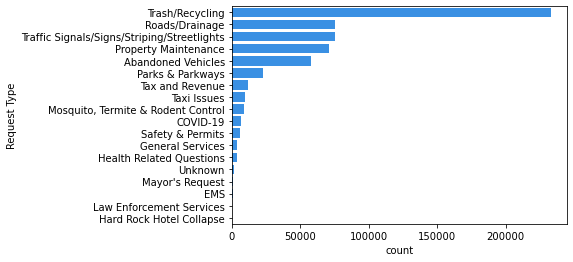

In [80]:
# Explore the categories of 'Request Type' column:

explore_categorical('Request Type', df)

It appears that the bottom five categories barely have any values in it, and one of them is 'Unknown'. All five could be merged into one category without a loss of granularity.

In [81]:
df['Request Type'].replace({
    "Unknown":"other",
    "Mayor's Request":"other",
    "EMS":"other",
    "Law Enforcement Services":"other",
    "Hard Rock Hotel Collapse":"other"}, inplace = True)

In [82]:
# Check my work:
df['Request Type'].value_counts()

Trash/Recycling                                232945
Roads/Drainage                                  75046
Traffic Signals/Signs/Striping/Streetlights     75041
Property Maintenance                            70768
Abandoned Vehicles                              57949
Parks & Parkways                                22636
Tax and Revenue                                 12056
Taxi Issues                                      9438
Mosquito, Termite & Rodent Control               9077
COVID-19                                         6901
Safety & Permits                                 6008
General Services                                 3768
Health Related Questions                         3709
other                                            3428
Name: Request Type, dtype: int64

### `Request Reason`
[(back to list)](#Data-Cleaning)

It look like `Request Type` and `Request Reason` essentially contain the same information. I need to choose which column I will be working with, and possibly remove the one that's less advantageous. To start, I would like to compare the two columns. 

In order to do so I need to clean up `Request Reason` - at the moment it has 121 categories, which is too many.

- Approach 1: Combine the botttom 5% of categories into 'other'.
The results were not satisfying:
I ended up with 37 categories (that I could condense to 19). The problem was that the bottom 5% of all categories turned out to be a large fraction compared to the rest of the categories. My new category 'other' was on the 6th place by number of associated requests.

- Approach 2: Attempt condensing 121 categories of `Request Reason` into broader groups, evaluate results, compare to `Request Type`.
Again, the results were not satisfying: this method introduced a large scale of unnecessary bias into my dataset.

**Solution:** leave `Request Reason` as is for now. I may be interested seeing top 20 categories, and how they distribute across other variables. I amy also consider grouping only certain Request Reasons to identify patterns.

Below I have documented my steps, trying both approaches described above. I have only kep the essential pieces.

In [83]:
df['Request Reason'].unique() # to explore all categories

array(['Unknown', 'COVID-19 Business Non-Compliance',
       'Missed Trash Pick-Up', 'Order Trash Cart',
       'Street Light Outage/Malfunction', 'Illegal Dumping',
       'Safety & Permits Request (Cyber Incident Back Up)',
       'Replace Trash Cart', 'Property Maintenance',
       'Request a Large Item Pick Up', 'Catch Basin - Clogged',
       'Request Tree Service (Right of Way/Public Property)',
       'Licenses & Permits', 'Street Name Sign Damaged or Missing',
       'Abandoned/Junk Vehicles', 'Hard Rock Event- Medical Needs',
       'Request for Traffic Calming due to Speeding',
       'Vehicle Blocking Your Driveway', 'Dead Animal Pick Up',
       'Non-Rodent Complaint (Mice, Possums, Snakes)',
       'Traffic Sign Missing/Damaged', 'MIssed Recycling Pick-Up',
       'Order Recycling Cart', 'Sales Tax Question', 'EMS General',
       'Replace Recycling Cart', 'Request for Stop Sign', 'Service Cut',
       'WaterMain Break', 'Street Subsidence (Sinking)', 'Pothole',
       'Hi

**Approach 1:**

In [84]:
temp_df = df['Request Reason'].value_counts().to_frame()
temp_df['cumsum'] = temp_df['Request Reason'].cumsum()

temp_df['cumperc'] = (temp_df['cumsum']/temp_df['Request Reason'].sum()).mul(100).round(2)

temp_df

,Request Reason,cumsum,cumperc
Property Maintenance,70827,70827,12.03
Request a Large Item Pick Up,60400,131227,22.29
Abandoned/Junk Vehicles,56463,187690,31.88
Street Light Outage/Malfunction,47198,234888,39.89
Order Recycling Cart,36467,271355,46.09
...,...,...,...
Sidewalk,2,588765,100.00
Translation Line,2,588767,100.00
Oak tree blocking water line,1,588768,100.00
Collapsed Structure,1,588769,100.00


<AxesSubplot:>

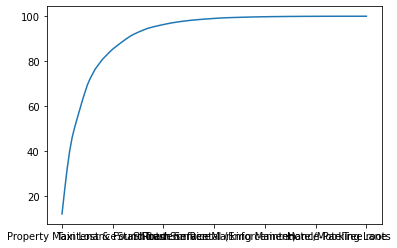

In [85]:
temp_df['cumperc'].plot()

In [86]:
# Create new df that would only include the upper 95%
cutoff = temp_df[temp_df['cumperc'] > 95]

In [87]:
request_reason = {}
for rr in temp_df.index:
   request_reason[rr] = rr


for rr in cutoff.index:
   request_reason[rr] = 'other'

In [88]:
df['New Request Reason'] = df['Request Reason'].map(request_reason)

In [89]:
# Show how many categories I have left after combining the lower % into one category
df['New Request Reason'].nunique()

37

In [90]:
# Show how my new category 'other' compares to the rest of the categories
df['New Request Reason'].value_counts(dropna = False)

Property Maintenance                                                    70827
Request a Large Item Pick Up                                            60400
Abandoned/Junk Vehicles                                                 56463
Street Light Outage/Malfunction                                         47198
Order Recycling Cart                                                    36467
other                                                                   29537
Missed Trash Pick-Up                                                    26456
Pothole                                                                 23508
Drainage Issue (Catch Basins, Culverts, Ditches, and Manhole Covers)    23156
Illegal Dumping                                                         22916
Order Trash Cart                                                        21086
Request Tree Service (Right of Way/Public Property)                     20232
Replace Trash Cart                                              

In [91]:
# Because I am not using this approach for further analysis, I need to drop the new column:

df.drop(columns = 'New Request Reason', inplace = True)

**Approach 2:**

In [92]:
# Create a dataframe for easiest comparison of the two columns:

comparison_table = df.groupby(['Request Reason', 'Request Type']).size().to_frame('size')
comparison_table

size
Request Reason                                 Request Type                                      
Abandoned/Junk Vehicles                        Abandoned Vehicles                           56463
Accessibility Ramps, Curbs and Sidewalk Repair Parks & Parkways                                 2
                                               Roads/Drainage                                4623
Additional signage                             Traffic Signals/Signs/Striping/Streetlights    954
Alley Way                                      Roads/Drainage                                 234
...                                                                                           ...
Unknown                                        Trash/Recycling                                  6
                                               other                                         1755
Unpermitted work in ROW                        Roads/Drainage                                 113
Vehicle Blocking Your Driveway                 Abandoned Vehicles                            1485
WaterMain Break                                Roads/Drainage                                 355

[160 rows x 1 columns]

In [93]:
# Show me the entire table

pd.set_option('display.max_rows', comparison_table.shape[0]+1)
comparison_table

size
Request Reason                                     Request Type                                      
Abandoned/Junk Vehicles                            Abandoned Vehicles                           56463
Accessibility Ramps, Curbs and Sidewalk Repair     Parks & Parkways                                 2
                                                   Roads/Drainage                                4623
Additional signage                                 Traffic Signals/Signs/Striping/Streetlights    954
Alley Way                                          Roads/Drainage                                 234
                                                   Traffic Signals/Signs/Striping/Streetlights      1
Bicycle Hazardous Incident Reporting               Roads/Drainage                                  49
Business Renewal                                   Tax and Revenue                                146
COVID-19 Business Non-Compliance                   COVID-19                                      6848
Catch Basin - Broken/Damage                        Roads/Drainage                                 997
Catch Basin - Clogged                              Roads/Drainage                                5217
Change Size of Trash Cart                          Trash/Recycling                                214
Collapsed Structure                                General Services                                 1
Construction debris                                General Services                                 1
                                                   Roads/Drainage                                 133
Construction permit                                Safety & Permits                               425
Crosswalks and Signage                             Roads/Drainage                                   1
                                                   Traffic Signals/Signs/Striping/Streetlights      2
Culvert Issue                                      Roads/Drainage                                 108
Damaged Caused By Contractor                       Trash/Recycling                               1292
Damaged Property                                   Roads/Drainage                                  22
                                                   Trash/Recycling                                  1
Damaged Sidewalk                                   Property Maintenance                             1
                                                   Roads/Drainage                                1738
Dead Animal Pick Up                                Trash/Recycling                               2729
Debris in Roadway                                  Parks & Parkways                                 2
                                                   Roads/Drainage                                 810
                                                   Trash/Recycling                                  8
Disabled Parking Sign                              Traffic Signals/Signs/Striping/Streetlights    187
Disabled Parking Sign                              Traffic Signals/Signs/Striping/Streetlights     99
Ditch Issue                                        Roads/Drainage                                 256
Drainage Issue (Catch Basins, Culverts, Ditches... Roads/Drainage                               23156
Drug Test Inquiry                                  Taxi Issues                                     52
EMS Complaint                                      other                                          209
EMS Compliment                                     other                                           28
EMS General                                        other                                           76
EMS Lost & Found                                   other                                          345
Entergy Bill Payment Assistance                    other                                          187
General Service R

Then I attempted to merge categories in larger groups manually by creating pandas dictionary. I did not include that part, because it brings no value to my analysis.

---
**End of `Request Reason` exploration**

Bottom five types have less that .5% values in it. I will condense those into a new type and will call it 'other'. Then I will come back and compare the two columns again.

### `Responsible Agency`
[(back to list)](#Data-Cleaning)


Responsible Agency 
--------------------
Feature 'Responsible Agency' has 22 unique categories

Department of Sanitation                                            0.393187
Department of Public Works                                          0.353243
Department of Code Enforcement                                      0.126088
Department of Parks & Parkway                                       0.037055
Bureau of Revenue                                                   0.019531
Safety and Permits                                                  0.018625
Ground Transportation Bureau                                        0.015587
Mosquito, Termite & Rodent Control Board                            0.015334
Unknown                                                             0.011208
Health Department                                                   0.006398
Executive Office of the Mayor                                       0.001199
Emergency Medical Services                              

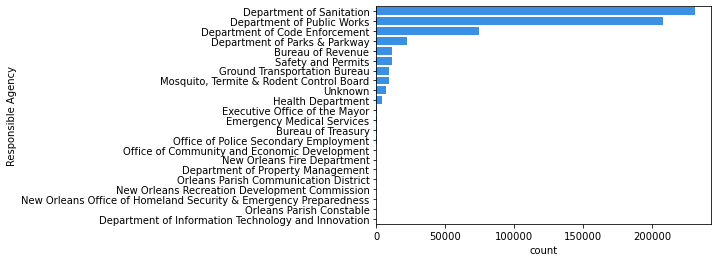

In [94]:
# Explotre the categories of 'Responsible Agency' column:

explore_categorical('Responsible Agency',df)

In [95]:
# Compress Responsible Agencies that have less that .5% values into one group and call it 'other'

df['Responsible Agency'].replace({
    'Executive Office of the Mayor':'other',
    'Emergency Medical Services':'other',
    'Bureau of Treasury':'other',
    'Office of Police Secondary Employment':'other',
    'Office of Community and Economic Development':'other',
    'New Orleans Fire Department':'other',
    'Department of Property Management':'other',
    'Orleans Parish Communication District':'other',
    'New Orleans Recreation Development Commission':'other',
    'New Orleans Office of Homeland Security & Emergency Preparedness':'other',
    'Orleans Parish Constable':'other',
    'Department of Information Technology and Innovation':'other'
}, inplace = True)

In [96]:
# Check

df['Responsible Agency'].value_counts()

Department of Sanitation                    231497
Department of Public Works                  207979
Department of Code Enforcement               74237
Department of Parks & Parkway                21817
Bureau of Revenue                            11499
Safety and Permits                           10966
Ground Transportation Bureau                  9177
Mosquito, Termite & Rodent Control Board      9028
Unknown                                       6599
Health Department                             3767
other                                         2204
Name: Responsible Agency, dtype: int64

### Date Columns
[(back to list)](#Data-Cleaning)

There are three Date columns. To have the advantages of datetime data type, I will convert all three columns. Additionally, I will format it to check that the entire dataframe uses a uniform date format.

In [97]:
# Step 1: Pull out a few records to have an example of used datetime format
df.sample()

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Longitude,Latitude
312643,101000272960,Trash/Recycling,Order Recycling Cart,01/02/2019 03:01:26 PM,03/23/2020 09:59:29 PM,06/18/2014 07:00:00 PM,Closed,Department of Sanitation,1705 VALMONT ST NEW ORLEANS LOUISIANA 70115,B,Closed,-90.11108,29.929382


In [98]:
# Step 2: convert all three columns, and format it at the same time
df['Date Created'] = pd.to_datetime(df['Date Created'], format='%m/%d/%Y %H:%M:%S %p')

In [99]:
df['Date Modified'] = pd.to_datetime(df['Date Modified'], format='%m/%d/%Y %H:%M:%S %p')

In [100]:
df['Date Closed'] = pd.to_datetime(df['Date Closed'], format='%m/%d/%Y %H:%M:%S %p')

In [101]:
# Check my work:
df.dtypes

Service Request #             object
Request Type                  object
Request Reason                object
Date Created          datetime64[ns]
Date Modified         datetime64[ns]
Date Closed           datetime64[ns]
Request Status                object
Responsible Agency            object
Address                       object
Council District              object
Status                        object
Longitude                    float64
Latitude                     float64
dtype: object

### `Request Status`
[(back to list)](#Data-Cleaning)

In [102]:
# Convert 'Request Status' into a binary column

df['Request Status'] = df['Request Status'].apply(lambda x: 1 if x == 'Pending' else 0)

In [103]:
# Now that 'Request Status' is a binary column, we can make it a boolean:

#df['Request Status'] = df['Request Status'].astype(bool)

In [104]:
df.dtypes

Service Request #             object
Request Type                  object
Request Reason                object
Date Created          datetime64[ns]
Date Modified         datetime64[ns]
Date Closed           datetime64[ns]
Request Status                 int64
Responsible Agency            object
Address                       object
Council District              object
Status                        object
Longitude                    float64
Latitude                     float64
dtype: object

### Remaining Categorical Columns

In [105]:
show_categorical(df)

There are 7 category features in this dataset.
category features are: ['Service Request #' 'Request Type' 'Request Reason' 'Responsible Agency'
 'Address' 'Council District' 'Status']


,Service Request #,Request Type,Request Reason,Responsible Agency,Address,Council District,Status
0,2019-631621,other,Unknown,Unknown,Unknown,Unknown,Pending
1,2021-830021,COVID-19,COVID-19 Business Non-Compliance,Safety and Permits,823 Fulton St,B,Pending
2,2021-821555,Trash/Recycling,Missed Trash Pick-Up,Department of Sanitation,1672 Rousselin Dr,D,Resolved
3,2021-821553,Trash/Recycling,Missed Trash Pick-Up,Department of Sanitation,1334 Bartholomew St,D,Resolved
4,2021-821552,Trash/Recycling,Missed Trash Pick-Up,Department of Sanitation,1564 N Prieur St,D,Resolved


All columns from the above have been addressed, and I am moving on to the next item in my [Data Cleaning To-Do List](Data-Cleaning-To-Do-List).

### Location Columns

In [106]:
# Check Lon/Lat = 0.00
lon = len(df[df['Longitude'] == 0.00])/len(df['Longitude'])
round(lon*100,2)

6.26

In [107]:
# Check Lon/Lat = 0.00
lat = len(df[df['Latitude'] == 0.00])/len(df['Latitude'])
round(lat*100,2)

6.26

In [108]:
print(f"There is {round(lon*100,2)}% of data that is missing (replaced by zero values) in 'Longitude', and {round(lat*100,2)}% is missing in 'Latitude'. I will keep this in mind when working with it.")

There is 6.26% of data that is missing (replaced by zero values) in 'Longitude', and 6.26% is missing in 'Latitude'. I will keep this in mind when working with it.


### Reorganise columns

In [109]:
# Make sure that after I make changes, the shape of df stays the same

df.shape

(588770, 13)

In [110]:
# Reorganise my columns:

df = df.loc[:, ['Service Request #', 'Date Created', 'Request Type','Request Reason', 'Responsible Agency', \
                'Address', 'Council District', 'Status','Request Status','Date Closed','Date Modified', 'Latitude',\
                'Longitude']]
# check
df.shape

(588770, 13)

In [111]:
# My clean dataframe:

df.sample()

,Service Request #,Date Created,Request Type,Request Reason,Responsible Agency,Address,Council District,Status,Request Status,Date Closed,Date Modified,Latitude,Longitude
18886,2022-860252,2022-02-10 02:25:33,Traffic Signals/Signs/Striping/Streetlights,Street Light Outage/Malfunction,Department of Public Works,GRANT ST & WERNER DR,E,Pending,1,NaT,2022-02-10 02:25:33,30.017484,-89.993438


## Data Cleaning Summary

[(back to Table of Contents)](#Table-of-Contents)

In [112]:
 print(f"I have started with {df0.shape[0]} rows and {df0.shape[1]} columns,\
  and after cleaning the data I now have {df.shape[0]} rows and {df.shape[1]} columns.\
  This is what a sample row of my initial dataframe looked like.")
df0.head(1)

I have started with 595097 rows and 19 columns, and after cleaning the data I now have 588770 rows and 13 columns. This is what a sample row of my initial dataframe looked like.


,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Contractor,Contractor Action,RowID,X,Y,Longitude,Latitude,Location
0,2019-631621,NaN,NaN,11/06/2019 03:32:28 PM,11/06/2019 03:32:28 PM,NaN,Pending,NaN,NaN,NaN,NaN,NaN,NaN,631621,NaN,NaN,0.0,0.0,"(0.0, 0.0)"


In [113]:
print('Below is a sample row of my final dataframe after cleaning:')
df.head(1)

Below is a sample row of my final dataframe after cleaning:


,Service Request #,Date Created,Request Type,Request Reason,Responsible Agency,Address,Council District,Status,Request Status,Date Closed,Date Modified,Latitude,Longitude
0,2019-631621,2019-11-06 03:32:28,other,Unknown,Unknown,Unknown,Unknown,Pending,1,NaT,2019-11-06 03:32:28,0.0,0.0


In [114]:
df.shape

(588770, 13)

In [115]:
print(f"The number of rows is reduced by {round((df0.shape[0]-df.shape[0])/df0.shape[0]*100)}% \
and the number of columns is reduced by {round((df0.shape[1]-df.shape[1])/df0.shape[1]*100)}%.")

The number of rows is reduced by 1% and the number of columns is reduced by 32%.


**Implemented changes:**

1. Confimed that `Service Request #` does not have duplicate values. Removed `RowID` column because `Service Request #` performs its function in a more meaningful way.
2. Removed columns `X` and `Y` because they do not bring any value to this dataset, since we are not provided a description that would clarify `X` and `Y` meaning/
3. Removed `Contractor Action` and `Contractor` as 99.86% and 91.16% (word) contained no information in it.
4. Confirmed that `Status` and `Request Status` are not duplicates. However, only a sample fraction of `Status` contains more informative categories, and the rest of it mirrors `Request Status`.
4. Revealed that `Request Type` and `Request Reason` contain different, but very similar categories. Explored `Request Reason` and left unchanged. Condensed `Request Type`'s categories.
6. Confirmed that given dataset does not have duplicate rows.
7. Confirmed that the dataset does not contain empty rows.
8. Identified all missing values by Column:
    
    8.1. Removed rows with `Status` set to 'cancelled', 'invalid', or ' duplicated' request; condensed some of the categories within `Status`, and fulfilled the missing values based on `Request Status` column.
    
    8.2. Fulfilled the missing values in `Council District` based zip code contained in `Address`, and replaced the rest of the missing values (4.15% of the total) with 'Unknown'.
    
    8.3. Inspected `Date Closed`. Fulfilled missing values for pending cases based on `Date Modified`. Changed `Request Status` to 'Closed' for those rows where `Date Closed` was present. Confirmed that only Pending cases hve null values.
    
    8.4. Replaced the missing values with 'Unknown' in the remaining columns:
    |Column|%of values tha are missing|
    |------|--------------------------|
    |Request Type| 0.3%|
    |Request Reason| 0.3%|
    |Responsible Agency | 1.12%|
    |Address | 2.07% |
    
9. Condensed categories in `Responsible Agency`.
10. Converted `Request Status` into boolean data type.
11. Identified that 6% of `Longitude` and `Latitude` have values equal to zero.
12. Converted all date columns into datetime type, and made sure date format is uniform across the entire database. Discovered that `Date Modified` is mostly not the same as `Date Closed` - kept both columns.

# Exploratory Data Analysis

In [116]:
df.head()

,Service Request #,Date Created,Request Type,Request Reason,Responsible Agency,Address,Council District,Status,Request Status,Date Closed,Date Modified,Latitude,Longitude
0,2019-631621,2019-11-06 03:32:28,other,Unknown,Unknown,Unknown,Unknown,Pending,1,NaT,2019-11-06 03:32:28,0.000000,0.000000
1,2021-830021,2021-10-05 09:40:15,COVID-19,COVID-19 Business Non-Compliance,Safety and Permits,823 Fulton St,B,Pending,1,NaT,2021-10-05 09:40:16,29.943975,-90.065412
2,2021-821555,2021-09-15 10:10:42,Trash/Recycling,Missed Trash Pick-Up,Department of Sanitation,1672 Rousselin Dr,D,Resolved,0,2021-12-15 04:24:59,2021-12-15 10:24:59,29.979937,-90.073291
3,2021-821553,2021-09-15 09:54:40,Trash/Recycling,Missed Trash Pick-Up,Department of Sanitation,1334 Bartholomew St,D,Resolved,0,2021-12-15 04:25:14,2021-12-15 10:25:14,29.968404,-90.034680
4,2021-821552,2021-09-15 09:46:53,Trash/Recycling,Missed Trash Pick-Up,Department of Sanitation,1564 N Prieur St,D,Resolved,0,2021-12-15 04:25:55,2021-12-15 10:25:55,29.974061,-90.068478


### EDA To-Do List:

1. Create a new column that shows the number of days it took to close each request
2. Distribution of `Request Reason`:
    - by `Responsible Agency`
    - by `Council District`
3. Business of `Responsible Agency` by year, by month (add those columns), by `Council District`

4. `Request Reason` popularity:
    - by `Council District`
    - by month (discrete)
    - over time (continuous)
5. What am I supposed to do with finding max, min, average, correlction, etc?
6. What am I missing?

I would like to start with setting a `Date Created` as df index to easier filter data as needed.

In [117]:
# Step 1: Create a copy of `Date Created`, as I would keep the original column
df['Index'] = df['Date Created']

In [118]:
from datetime import datetime as dt

df[df['Date Created'] < dt(year=2020, month=1, day=1)].sample(3)

,Service Request #,Date Created,Request Type,Request Reason,Responsible Agency,Address,Council District,Status,Request Status,Date Closed,Date Modified,Latitude,Longitude,Index
104606,101000117364,2019-01-01 09:33:04,General Services,Historical Lagan Ticket,Unknown,"Sallinger, Linda NEW ORLEANS LOUISIANA",Unknown,Closed,0,2013-03-18 07:00:00,2020-03-23 09:59:32,0.000000,0.000000,2019-01-01 09:33:04
474699,101000725817,2019-01-01 11:59:58,Roads/Drainage,Street Subsidence (Sinking),Department of Public Works,1722 N Broad St NEW ORLEANS LOUISIANA 70119,B,Closed,0,2017-09-06 07:00:00,2020-03-23 09:59:22,29.981211,-90.073174,2019-01-01 11:59:58
319670,101000248703,2019-01-02 03:01:26,Taxi Issues,Taxi Lost & Found Item,Ground Transportation Bureau,"Gordon, Bryce NEW ORLEANS LOUISIANA",Unknown,Closed,0,2014-04-28 07:00:00,2020-03-23 09:59:30,0.000000,0.000000,2019-01-02 03:01:26


In [119]:
# Set 'Date Created' as df index
df.set_index('Index', inplace = True)

In [120]:
df.sample(3)

,Service Request #,Date Created,Request Type,Request Reason,Responsible Agency,Address,Council District,Status,Request Status,Date Closed,Date Modified,Latitude,Longitude
Index,,,,,,,,,,,,,
2021-01-04 11:07:38,2021-742885,2021-01-04 11:07:38,Property Maintenance,Property Maintenance,Department of Code Enforcement,301 S White St,B,Closed,0,2021-01-05 06:29:56,2021-01-05 06:29:56,29.964739,-90.090652
2019-01-01 11:59:58,101000704649,2019-01-01 11:59:58,"Mosquito, Termite & Rodent Control",Rodent Complaint (Rats),"Mosquito, Termite & Rodent Control Board",7908 Mercier St NEW ORLEANS LOUISIANA 70128,E,Closed,0,2017-07-18 07:00:00,2020-03-23 09:59:22,30.052770,-89.974071
2019-01-02 01:30:14,101000777106,2019-01-02 01:30:14,Roads/Drainage,Pothole,Department of Public Works,ST CHARLES AVE & HILLARY ST NEW ORLEANS LOUISI...,A,Closed,0,2018-02-28 06:00:00,2020-03-23 09:59:21,29.939771,-90.130231


To explore the dataset further, it would be helpful to have  `Month` and `Year` columns, again - based on `Date Created`. 

In [121]:
df['Request Month'] = pd.DatetimeIndex(df['Date Created']).month

In [122]:
df['Request Year'] = pd.DatetimeIndex(df['Date Created']).year

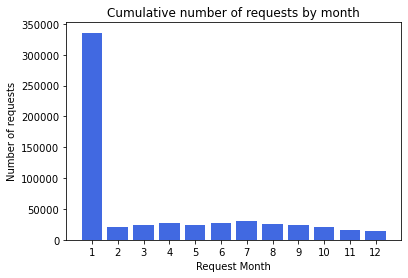

In [123]:
# Show distribution of requests by month

cum_month = df[['Request Month', 'Service Request #']].groupby(['Request Month']).count().reset_index()

plt.figure()
plt.bar(cum_month['Request Month'], cum_month['Service Request #'], color = 'royalblue')
plt.xlabel('Request Month')
plt.xticks(cum_month['Request Month'])
plt.ylabel('Number of requests')
plt.title('Cumulative number of requests by month')
plt.show()

**Observation:**<br>
January appears to be by far the busiest month. At this point I have no logical explanation or a guess to this. I would expect August or December to be the busiest when people are trying to get things done before the school start or before a year end.<br>

**Next Step:**<br>
Have a look at the distribution of requests by month by year. I am curious to see if January is consistently the busiest month of the year.

In [124]:
cum_year_month = df[['Request Year', 'Request Month', 'Service Request #']]\
.groupby(['Request Year', 'Request Month']).count()

Text(0.5, 1.0, 'Cumulative number of requests by year/month')

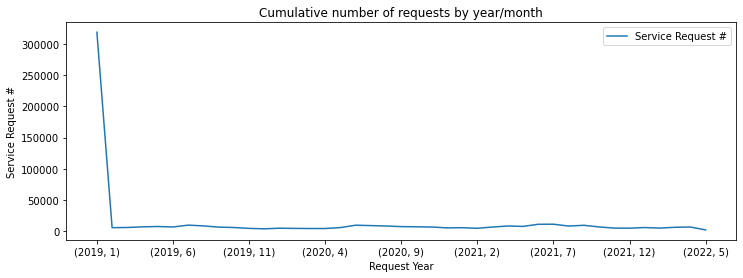

In [125]:
cum_year_month.plot(figsize=(12,4))
plt.xlabel('Request Year')
#plt.xticks('Request Month')
plt.ylabel('Service Request #')
plt.title('Cumulative number of requests by year/month')

**Observation:**
1. The earliest records in the data set have been created in January 2019, and that is the January that spikes request distribution across the year.
2. Despite the fact that this data set contains records from 2012 to present, 2022, there are no records with `Date Created` prior to January 2019.

**Next Steps:**
1. Check the earliest and the latest date  stored in `Date Created`
2. At this point I know there are records in `Date Closed` that are older that January 2019. Check what information is stored in `Date Created` for those records. 

In [126]:
print(f"The earliest date in `Date Created` is {df['Date Created'].min()}, and the latest date is \
{df['Date Created'].max()}, which is the cutoff    day, when I  downloaded the data set.")

The earliest date in `Date Created` is 2019-01-01 09:33:04, and the latest date is 2022-05-10 02:03:33, which is the cutoff    day, when I  downloaded the data set.


In [127]:
df['Closed Year'] = pd.DatetimeIndex(df['Date Closed']).year


# Show requestes where 'Date Closed' < Jan 2019

df[df['Closed Year'] < 2019].sample(5)

,Service Request #,Date Created,Request Type,Request Reason,Responsible Agency,Address,Council District,Status,Request Status,Date Closed,Date Modified,Latitude,Longitude,Request Month,Request Year,Closed Year
Index,,,,,,,,,,,,,,,,
2019-01-01 09:33:06,101000186997,2019-01-01 09:33:06,Property Maintenance,Property Maintenance,Department of Code Enforcement,1327 MILTON ST NEW ORLEANS LOUISIANA 70122,D,Closed,0,2013-09-22 07:00:00,2020-03-23 09:59:31,29.995859,-90.079970,1,2019,2013.0
2019-01-02 10:29:56,101000582853,2019-01-02 10:29:56,Parks & Parkways,Request Tree Service (Right of Way/Public Prop...,Department of Parks & Parkway,3615 Dearmas St NEW ORLEANS LOUISIANA 70114,C,Closed,0,2016-08-21 07:00:00,2020-03-23 09:59:24,29.942323,-90.018131,1,2019,2016.0
2019-01-01 11:59:58,101000721915,2019-01-01 11:59:58,Trash/Recycling,Request a Large Item Pick Up,Department of Sanitation,4937 S Claiborne Ave NEW ORLEANS LOUISIANA 70125,B,Closed,0,2017-08-27 07:00:00,2020-03-23 09:59:22,29.940971,-90.107893,1,2019,2017.0
2019-01-02 11:43:09,101000051349,2019-01-02 11:43:09,Trash/Recycling,Order Trash Cart,Department of Sanitation,718 JENA ST NEW ORLEANS LOUISIANA 70115,B,Closed,0,2013-01-23 06:00:00,2020-03-23 09:59:33,29.919115,-90.102896,1,2019,2013.0
2019-01-02 11:43:10,101000075372,2019-01-02 11:43:10,Trash/Recycling,Order Recycling Cart,Department of Sanitation,1408 TOURO ST NEW ORLEANS LOUISIANA 70116,C,Closed,0,2012-11-12 06:00:00,2020-03-23 09:59:32,29.971646,-90.059809,1,2019,2012.0


In [128]:
print(f"There are {len(df['Date Created'] > df['Date Closed'])} records where 'Date Created' is greater than 'Date Closed',\
 which is {round(len(df[df['Date Created'] > df['Date Closed']])/df.shape[0]*100)} % of all records.")

There are 588770 records where 'Date Created' is greater than 'Date Closed', which is 50 % of all records.


## Conclusion and Next Steps

`Date Created` is **crucial** to my Business Question. I will not be able to calculate the number of days it takes to satisfy a service request. At this point I only have two and a half years worth of valid data. 

The cutoff month of my valid data falls on the first month after the the City of New Orleans' 311 Call Center moved to 24 hour operations with the Orleans Parish Communications District (OPCD). Judging by the size of the data set, it may hold all the records from 2012-2018, and for some reason after the merge, `Date Created` got corrupted for all existing cases at the time. Testing this assumption is one of the three options I have at this point:

1. Test the assumption above
2. Keep the current data set and only work with 2.5 years worth of records
3. Explore the alternative data set that holds records from 2012 to 2018


**Next Steps:**
1. Check if I can locate requests from the current data set in the archived data set by their `Service Request #`
2. If so, explore other columns in the archive data set and merge selected columns with the current data set
3. Create a new column for correct 'Date Created', and find a way to combine the corresponding columns from each of the data sets into the new column

In addition to fulfilling the missing date field (`Date Closed`), I am curious to see if the archived data has more or less  missing values, and to compare it to the results of my data cleaning. For example, are there more `Council District` values in the archived data? If so, did I fulfill the missing values correctly? Should be looking up other column values and comparing them to the new data?

For this reason I want to import more than just the `Date Closed` variable. 

Next step:
Load selected columns from both data sets, explore and compare

**Note:** For clear distinction between Part 1 and Part of this workbook, I will give my DataFrames new names

 ---
 # CHAPTER II
 ---

 ## Explore 2012-2018 data set and compare to the current data set

To make a fair comparison, I will have to be working with the two data sets at the same level of cleanliness. I will either have to clean the archived data set they way i cleaned the current data set, or see if I can compare the two sets as they are prior to any cleaning. Because at this point I am not sure if my assuption is true and the archived data set could be useful, I prefer to not invest time into cleaning it. 

**Next Steps:**<br>
- Load the archived data set from [**here**](https://catalog.data.gov/dataset/311-calls-historic-data-2012-2018)
- Go back to df0 (the unchanged current data set) to test my assumptions and compare the data

## Load the archived data set

In [129]:
# Explore 311_Calls__Historic_Data__2012-2018
historic_data = pd.read_csv('311_Calls__Historic_Data__2012-2018_.csv')

In [130]:
historic_data.head()

,ticket_id,issue_type,ticket_created_date_time,ticket_closed_date_time,ticket_status,issue_description,street_address,neighborhood_district,council_district,city,state,zip_code,location,geom,latitude,longitude,closure_reason,case_title
0,101000847991,Street Light,08/21/2018 02:03:55 PM,08/28/2018 09:38:35 AM,Closed,Issue: Outage Or Cycling | Pole number: PB164,5417 Constance St,WEST RIVERSIDE,A,NEW ORLEANS,LA,70115.0,"(29.9202224971517, -90.1157700850457)",NaN,29.920222,-90.115770,Case is Invalid,Streetlight - Outage Or Cycling
1,101000847903,Large Item Trash/Garbage Pickup,08/21/2018 12:29:40 PM,08/28/2018 10:51:27 AM,Closed,Description of item: 4 bags of trash,1801 S White St,BROADMOOR,B,NEW ORLEANS,LA,70125.0,"(29.950804540038, -90.1019344489206)",NaN,29.950805,-90.101934,Case Resolved,Large Item Trash/Garbage Pickup
2,101000849742,Pothole/Roadway Surface Repair,08/24/2018 02:41:00 PM,08/28/2018 09:38:50 AM,Closed,Street area affected: Travel Lane / Roadway | ...,MAYO RD & I 10 E SERVICE RD,WEST LAKE FOREST,E,NEW ORLEANS,LA,70126.0,"(30.0271568286374, -90.0028355253192)",NaN,30.027157,-90.002836,NaN,Pothole/Roadway Surface Repair (District E)
3,101000847653,Trash/Garbage Pickup,08/20/2018 04:28:36 PM,08/28/2018 02:03:28 PM,Closed,Issue: Replace Trash Cart,4038 DHemecourt St,MID-CITY,A,NEW ORLEANS,LA,70119.0,"(29.9699067477013, -90.1045471973296)",NaN,29.969907,-90.104547,Case Resolved,Replace Trash Cart
4,101000850848,Code Enforcement General Request,08/28/2018 11:34:00 AM,08/28/2018 01:02:24 PM,Closed,| High Weeds: Yes,712 Diana St,McDONOGH,C,NEW ORLEANS,LA,70114.0,"(29.9446163523183, -90.0491191933234)",NaN,29.944616,-90.049119,Case Resolved,Code Enforcement General Request


In [131]:
# Take a look at the shape of dataset
print(f'There are {historic_data.shape[0]} rows and {historic_data.shape[1]} columns in the dataset.')
print(f'There are {df0.shape[0]} rows and {df0.shape[1]} columns in the dataset.')

There are 303735 rows and 18 columns in the dataset.
There are 595097 rows and 19 columns in the dataset.


In [132]:
# Show data metrics
print("The historic_data dataset contains:")
print(f"{historic_data.isna().sum().sum()} null values, that is {round(historic_data.isna().sum().sum()/(historic_data.isna().sum().sum()+historic_data.notnull().sum().sum())*100,2)}% of all dataset")
print(f"{historic_data.duplicated().sum()} duplicated rows")

The historic_data dataset contains:
469979 null values, that is 8.6% of all dataset
1227 duplicated rows


In [133]:
# Show data set info
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303735 entries, 0 to 303734
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ticket_id                 303735 non-null  int64  
 1   issue_type                303735 non-null  object 
 2   ticket_created_date_time  303735 non-null  object 
 3   ticket_closed_date_time   277779 non-null  object 
 4   ticket_status             303735 non-null  object 
 5   issue_description         289266 non-null  object 
 6   street_address            289660 non-null  object 
 7   neighborhood_district     290902 non-null  object 
 8   council_district          290928 non-null  object 
 9   city                      290938 non-null  object 
 10  state                     290938 non-null  object 
 11  zip_code                  290052 non-null  float64
 12  location                  303735 non-null  object 
 13  geom                      0 non-null       f

In [134]:
# Show % of missing values and where they are

na_table = historic_data.isna().mean().mul(100).round(2)
na_table[na_table > 0]

ticket_closed_date_time      8.55
issue_description            4.76
street_address               4.63
neighborhood_district        4.23
council_district             4.22
city                         4.21
state                        4.21
zip_code                     4.50
geom                       100.00
closure_reason              15.41
dtype: float64

In [135]:
# How many variables do I have in each of the present data types?

historic_data.dtypes.value_counts()

object     13
float64     4
int64       1
dtype: int64

**Observation and Next Steps:**

Aside from `ticket_created_date_time` columns, there are a few more columns that I would like to look into.
In the current data set there are variables with many null values, and there are a few columns I am hoping to get more clarity on. For further investigation I have selected those columns of the historic_data that I think may be analogus to the columns mentioned above.<br><br>
I will also reload the current data with only those columns that I have left at the end of the cleaning in Chapter I to avoid cluttering my combined set as much as I can.

### Reload historic_data with a new name and selected columns only 

In [136]:
# Select columns from the OLD data

cols_archive = ['ticket_id', 'issue_type', 'ticket_created_date_time',
       'ticket_closed_date_time', 'ticket_status', 'issue_description',
       'street_address', 'neighborhood_district', 'council_district', 'city',
       'state', 'zip_code', 'closure_reason', 'case_title']

In [137]:
# Reload the historic data with selected columns only and give it a new name to avoid confusion

archive = pd.read_csv('311_Calls__Historic_Data__2012-2018_.csv', usecols=cols_archive) #, dtype=col_types)
# archive['ticket_id'] = archive['ticket_id'].astype(str)

In [138]:
# check
archive.sample(random_state = 5)

,ticket_id,issue_type,ticket_created_date_time,ticket_closed_date_time,ticket_status,issue_description,street_address,neighborhood_district,council_district,city,state,zip_code,closure_reason,case_title
213090,101000528491,Abandoned Vehicle Reporting/Removal,04/12/2016 04:56:36 PM,04/19/2016 02:41:42 PM,Closed,Color: Yellow/Gold | Make: Chevrolet | Model: ...,RUE NICHOLE & CARLISLE CT,OLD AURORA,C,NEW ORLEANS,LA,70131.0,Case Resolved,Abandoned Vehicle Reporting/Removal


### Reload current data with a new name and selected columns only

In [139]:
# I will only select those columns that I kept in the clean data set from CHAPTER I
df.columns

Index(['Service Request #', 'Date Created', 'Request Type', 'Request Reason',
       'Responsible Agency', 'Address', 'Council District', 'Status',
       'Request Status', 'Date Closed', 'Date Modified', 'Latitude',
       'Longitude', 'Request Month', 'Request Year', 'Closed Year'],
      dtype='object')

In [140]:
# Select columns from the NEW data

cols_current = ['Service Request #', 'Date Created', 'Request Type', 'Request Reason',
       'Responsible Agency', 'Address', 'Council District', 'Status',
       'Request Status', 'Date Closed', 'Date Modified', 'Latitude',
       'Longitude']

In [141]:
current = pd.read_csv('311_OPCD_Calls__2012-Present_.csv', usecols=cols_current)

C:\Users\nadia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [142]:
# check
current.sample(3, random_state = 303) # use random_state as i will be using request ID from here in the next step

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Longitude,Latitude
145720,2020-726856,Trash/Recycling,Dead Animal Pick Up,11/02/2020 03:38:31 PM,11/10/2020 06:39:36 PM,NaN,Closed,Department of Sanitation,1100 Milton St,D,NaN,-90.084076,29.995362
486810,101000698957,Property Maintenance,Property Maintenance,01/01/2019 11:59:57 PM,03/23/2020 09:59:23 PM,06/29/2017 07:00:00 PM,Closed,Department of Code Enforcement,3005 Allen St NEW ORLEANS LOUISIANA 70122,NaN,NaN,-90.065359,29.988616
306344,101000290166,Trash/Recycling,Order Recycling Cart,01/02/2019 03:01:27 PM,03/23/2020 09:59:29 PM,08/05/2014 07:00:00 PM,Closed,Department of Sanitation,2112 AMELIA ST NEW ORLEANS LOUISIANA 70115,NaN,NaN,-90.096449,29.932419


**Next Step:** Check to see if the Ticket # and Request # information is the same.<br>

## Explore Request IDs

In [143]:
# Check formats of request ID

print(f"'Service Request #' data type: {current['Service Request #'].dtype}")
print(f"'ticket_id' data type: {archive['ticket_id'].dtype}")

'Service Request #' data type: object
'ticket_id' data type: int64


In [144]:
# Obtain a 'ticket_id' from the random sample (above) of archive and try locating it in the current

current[current['Service Request #'] == '101000290166']

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,Status,Longitude,Latitude
306344,101000290166,Trash/Recycling,Order Recycling Cart,01/02/2019 03:01:27 PM,03/23/2020 09:59:29 PM,08/05/2014 07:00:00 PM,Closed,Department of Sanitation,2112 AMELIA ST NEW ORLEANS LOUISIANA 70115,NaN,NaN,-90.096449,29.932419


I tried converting `Service Request #` to integer data type using the following code:<br>

>current['Service Request #'] = current['Service Request #'].astype(int)
<br>

and I got the following error message: ValueError: invalid literal for int() with base 10: '2019-631621'

**Conclusion:**
1. `Service Request #` may contain more than one data type<br>
<br>
2. `Service Request #` may be stored in two different formats based on which time period its record belongs to:
    - 2012 - 2018 suspected format requst ID format: yyyy-######
    - 2019 - 2022 suspected format requst ID format: ############

In [145]:
# Follow-up on Conclusion above

# How many data types are there in 'Service request #'?

current['Service Request #'].apply(type).value_counts()

<class 'str'>    464025
<class 'int'>    131072
Name: Service Request #, dtype: int64

In [146]:
# How many data types are there in 'ticket_id'?

archive['ticket_id'].apply(type).value_counts()

<class 'int'>    303735
Name: ticket_id, dtype: int64

Because I need to compare `Service Request #` and `ticket_id`, I need both columns to be in the same format. I can't convert `Service Request #` into integer, because some of its values are strings. Presumably the string values are stored in this kind of format yyyy-######. I could try getting rid of the dash, and make these values convertable into integers, but without further investigation, this may create data discrepancy. 

I will convert both columns into string type of data.

In [147]:
# Convert
current['Service Request #'] = current['Service Request #'].astype(str)

# Check
current['Service Request #'].apply(type).value_counts()

<class 'str'>    595097
Name: Service Request #, dtype: int64

In [148]:
# Convert
archive['ticket_id'] = archive['ticket_id'].astype(str)

# Check
archive['ticket_id'].apply(type).value_counts()

<class 'str'>    303735
Name: ticket_id, dtype: int64

Earlier we have confirmed that `Service Request #` does not contain duplicate values.<br>
<br>
**Next Steps:**
1. Confirm `Service Request #` has no duplicate values
2. Check `ticket_id` for duplicate values.

In [149]:
# Confirm `Service Request #` has no duplicate values

current['Service Request #'].is_unique

True

In [150]:
# Check `ticket_id` for duplicate values

archive['ticket_id'].is_unique

False

**Observation and Next Step:**<br><br>`ticket_id` is not unique. Next, I will take a look at duplicate rows in `archive`.

### `archive` duplicates

In [151]:
# First, check archive shape again to compare to it later
archive.shape

(303735, 14)

In [152]:
# Drop empty rows if any
archive.dropna(how = 'all')

# Check
archive.shape

(303735, 14)

In [153]:
# How many duplicate rows does archive have?
archive.duplicated().sum()

1301

In [154]:
print(f"{round(archive.duplicated().sum()/archive.shape[0]*100,2)}% of observations are duplicates.")

0.43% of observations are duplicates.


The scale of the problem is minimal, and its fair to ask, are these even duplicates?

In [155]:
# show a few duplicates
archive[archive.duplicated(keep = False)].sort_values(by = ['ticket_id']).head()

,ticket_id,issue_type,ticket_created_date_time,ticket_closed_date_time,ticket_status,issue_description,street_address,neighborhood_district,council_district,city,state,zip_code,closure_reason,case_title
93545,101000001000,Pothole/Roadway Surface Repair,03/19/2012 10:05:50 AM,11/08/2012 04:24:34 PM,Closed,Street type: Concrete | Street area affected: ...,4437 ANNUNCIATION ST,WEST RIVERSIDE,B,NEW ORLEANS,LA,70115.0,NaN,Pothole/Roadway Surface Repair (District B)
93546,101000001000,Pothole/Roadway Surface Repair,03/19/2012 10:05:50 AM,11/08/2012 04:24:34 PM,Closed,Street type: Concrete | Street area affected: ...,4437 ANNUNCIATION ST,WEST RIVERSIDE,B,NEW ORLEANS,LA,70115.0,NaN,Pothole/Roadway Surface Repair (District B)
199778,101000001441,Street Light,03/21/2012 09:52:21 AM,11/08/2012 05:04:05 PM,Closed,| Non-urgent issue: Outage Or Cycling,1504 CONGRESS ST,ST. CLAUDE,D,NEW ORLEANS,LA,70117.0,NaN,Outage Or Cycling
199779,101000001441,Street Light,03/21/2012 09:52:21 AM,11/08/2012 05:04:05 PM,Closed,| Non-urgent issue: Outage Or Cycling,1504 CONGRESS ST,ST. CLAUDE,D,NEW ORLEANS,LA,70117.0,NaN,Outage Or Cycling
105996,101000002297,Street Flooding/Drainage,03/23/2012 04:41:37 PM,04/24/2012 08:59:21 AM,Closed,Street type: Concrete | Is the issue with: Cat...,4522 BIENVILLE AVE,MID-CITY,A,NEW ORLEANS,LA,70119.0,Case Resolved,Street Flooding/Drainage (District A)


It seems unlikely that two requests were created and closed at exact same time. Additionally, other info in the duplicated rows are the same.
<br>
**Conclusion:**<br>
Remove the duplicates.

# Remove duplicates

In [156]:
# Remove duplicates
archive.drop_duplicates(inplace = True)

# Check
archive.duplicated().sum()

0

Confimed that values are duplicate values and removed them. Checked that there are no more full duplicates. Is `ticket_id` unique now?

In [157]:
archive['ticket_id'].is_unique

False

In [158]:
# How many duplicates are there in 'ticket_id'?
archive['ticket_id'].duplicated().sum()

20

There are 20 observations that have duplicated `ticket_id`. It is a very low number compared to the rest of the records. We can  remove them with no further investigation. However, I would like to see if there is a pattern or anything interesting about those duplicates.

In [159]:
archive[archive['ticket_id'].duplicated(keep = False)].sort_values(by = ['ticket_id'])

,ticket_id,issue_type,ticket_created_date_time,ticket_closed_date_time,ticket_status,issue_description,street_address,neighborhood_district,council_district,city,state,zip_code,closure_reason,case_title
171848,101000057670,Code Enforcement General Request,09/24/2012 03:09:40 PM,10/02/2012 10:37:50 AM,Closed,| Unoccupied: Yes | Partly Collapsed: Yes | Ra...,1715 URSULINES AVE,TREME - LAFITTE,D,NEW ORLEANS,LA,70116.0,Case Resolved,Code Enforcement General Request
77024,101000057670,Code Enforcement General Request,09/24/2012 03:09:40 PM,10/02/2012 10:37:50 AM,Closed,| Unoccupied: Yes | Partly Collapsed: Yes | Ra...,1715 URSULINES AVE,TREME - LAFITTE,C,NEW ORLEANS,LA,70116.0,Case Resolved,Code Enforcement General Request
165434,101000062575,Sidewalk Repair,10/04/2012 10:19:26 AM,NaN,Open,"| Is the issue with: Sidewalk | If ""Sidewalk"",...",7426 DARTMOOR DR,LITTLE WOODS,D,NEW ORLEANS,LA,70127.0,NaN,Dartmoor Drive (District D)
71815,101000062575,Sidewalk Repair,10/04/2012 10:19:26 AM,NaN,Open,"| Is the issue with: Sidewalk | If ""Sidewalk"",...",7426 DARTMOOR DR,LITTLE WOODS,E,NEW ORLEANS,LA,70127.0,NaN,Dartmoor Drive (District D)
192239,101000493022,Tree Service,01/07/2016 12:48:28 PM,01/13/2016 07:31:35 AM,Closed,| Type of Tree: Palm | Tree trim: Yes | Other ...,7426 DARTMOOR DR,LITTLE WOODS,D,NEW ORLEANS,LA,70127.0,Case Resolved,Tree Service
51312,101000493022,Tree Service,01/07/2016 12:48:28 PM,01/13/2016 07:31:35 AM,Closed,| Type of Tree: Palm | Tree trim: Yes | Other ...,7426 DARTMOOR DR,LITTLE WOODS,E,NEW ORLEANS,LA,70127.0,Case Resolved,Tree Service
48712,101000549971,Illegal Dumping Reporting,06/06/2016 02:03:39 PM,06/22/2016 04:27:01 PM,Closed,| Details of items dumped: There is piles of t...,1715 Ursulines Ave,TREME - LAFITTE,D,NEW ORLEANS,LA,70116.0,Case Resolved,Illegal Dumping Report
208600,101000549971,Illegal Dumping Reporting,06/06/2016 02:03:39 PM,06/22/2016 04:27:01 PM,Closed,| Details of items dumped: There is piles of t...,1715 Ursulines Ave,TREME - LAFITTE,C,NEW ORLEANS,LA,70116.0,Case Resolved,Illegal Dumping Report
102726,101000629545,Abandoned Vehicle Reporting/Removal,12/20/2016 09:43:00 AM,01/06/2017 02:22:38 PM,Closed,Color: White | Make: Unknown | Model: Neon | L...,7426 Dartmoor Dr,LITTLE WOODS,D,NEW ORLEANS,LA,70127.0,NaN,Junked Vehicle
171132,101000629545,Abandoned Vehicle Reporting/Removal,12/20/2016 09:43:00 AM,01/06/2017 02:22:38 PM,Closed,Color: White | Make: Unknown | Model: Neon | L...,7426 Dartmoor Dr,LITTLE WOODS,E,NEW ORLEANS,LA,70127.0,NaN,Junked Vehicle


There are only two things that differentiate the duplicates based on `ticket_id`: 
- different spelling of `neighborhood_district`
- discrepancy in `council_district`

Having two identical records where the only difference in `council_district` could be explained with what was discovered during data Cleaning in Part I. The boundaries between the districs in some areas are vague and hard to determine.
<br><br>
**Next Step:**<br>
Remove the records that have duplicated values in `ticket_id` and start the process of merging the two data sets.

In [160]:
#Drop the records that have duplicated values in ticket_id
archive.drop_duplicates(subset=['ticket_id'], inplace=True)

# Check
archive['ticket_id'].duplicated().sum()

0

In [161]:
# Check
archive['ticket_id'].is_unique

True

`ticket_id` is finally unique! There are no more duplicate values. Now I am ready to merge the data sets.

# Merge Data Sets

## Outer Join Merge

In [162]:
archive.shape, current.shape

((302414, 14), (595097, 13))

I expect no records in `archive` that would not be found in `current` dataset. In this case Left Join would be the appropriate choice. If my assumption is true, and there are no `archive`-unique records, an outer join will get the same results as a left join.

I would like to test the assumption and will be merging the data with outer join.
<br>
I expect to see the following numbers in the outer merge:
- number of rows = `current` number of rows
- number of columns = `archive` + `current` - 1 (-1 is the the one that I will be joining on)
- number of null values in the `date_created_current` = 0
- number of null values in the `date_created_archived` = `current` number of rows - `archive` number of rows

In [163]:
print("To translate the above asummptions to numbers:")
print(f"Expected number of rows = {current.shape[0]}")
print(f"Expected number of columns = {archive.shape[1] + current.shape[1]}")
print("Expected number of nulls in the 'Service Request #' = 0")
print(f"Expected number of nulls in the 'ticket_id' = {current.shape[0] - archive.shape[0]}")

To translate the above asummptions to numbers:
Expected number of rows = 595097
Expected number of columns = 27
Expected number of nulls in the 'Service Request #' = 0
Expected number of nulls in the 'ticket_id' = 292683


In [164]:
# Merge with outer join on request ID's
outer = pd.merge(left=current, right=archive,
         left_on='Service Request #',
         right_on='ticket_id',
         suffixes=("_current", "_archived"), # in case if I have identical column names in both data sets
         how='outer')

In [165]:
outer.shape

(596670, 27)

In [166]:
print(f"Actual number of rows = {outer.shape[0]}")
print(f"Actual number of columns = {outer.shape[1]}")
print(f"Actual number of nulls in 'Service Request #' = {outer['Service Request #'].isna().sum()}")
print(f"Actual number of nulls in 'ticket_id' = {outer['ticket_id'].isna().sum()}")

Actual number of rows = 596670
Actual number of columns = 27
Actual number of nulls in 'Service Request #' = 1573
Actual number of nulls in 'ticket_id' = 294256


The results are not what I expected:

|Number                      |Expected       |Actual       |Difference       |
|----------------------------|---------------|-------------|-----------------|
|rows                        |    595,097    |   596,670   |     + 1,573     |
|columns                     |    27         |   27        |     0           |
|nulls in 'Service Request #'|    0          |   1,573     |     + 1,573     |
|nulls in 'ticket_id'        |    292,683    |   294,256   |     + 1,573     |

**Observation:**<br>
There are 1,573 unexpected null values in `archive` that do not appear in the `current` for some reason. The purpose of merging is to have the original date when each request prior to Jan 2019 was created. However I want to see those columns that for some reason were not transferred into the `current` dataset.

**Next Step:**<br>
Explore those records that are unique to `archive` data set.

In [167]:
outer[outer['Date Created'].isna()]

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,...,ticket_status,issue_description,street_address,neighborhood_district,council_district,city,state,zip_code,closure_reason,case_title
595097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,Issue: Outage Or Cycling | Pole number: S104,NaN,Unknown,Unknown,Unknown,LA,NaN,Case is Invalid,Streetlight - Outage Or Cycling
595098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,NaN,NaN,Unknown,Unknown,Unknown,LA,NaN,Case is Invalid,NORDC - Park Complaint
595099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Open,Location: nordcParks.eastone | Cleanup: Yes | ...,NaN,Unknown,Unknown,Unknown,LA,NaN,NaN,NORDC - Park Maintenance
595100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,Description of item: tree limbs,4225 LAUREL ST,EAST RIVERSIDE,B,NEW ORLEANS,LA,70115.0,Case Resolved,Large Item Trash/Garbage Pickup
595101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,[Call 311 for details],NaN,Unknown,Unknown,Unknown,LA,NaN,NaN,NOLA 311 General Service Request
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,| Non-urgent issue: Outage Or Cycling | Pole n...,LAPEYROUSE ST & N DORGENOIS ST,SEVENTH WARD,D,NEW ORLEANS,LA,70119.0,NaN,Outage Or Cycling
596666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,Nature of request: New Recycling Cart,4914 LAINE AVE,PLUM ORCHARD,E,NEW ORLEANS,LA,70126.0,Case Resolved,New Recycling Cart
596667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,[Call 311 for details],NaN,Unknown,Unknown,Unknown,LA,NaN,Case Resolved,Finance - Revenue
596668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,Location: nordcParks.harrell | Repair: Yes | N...,NaN,Unknown,Unknown,Unknown,LA,NaN,Case Resolved,NORDC - Park Maintenance


What stands out to me is the 'Unknown' in column city. This is New Orleans' data set, and therefore, my assumption was that they would only have records that happened in New Orleans, not any other city. This may be data discrepancy, but I would like to take a look at the value distribution in `city`.

In [168]:
archive['city'].value_counts()

NEW ORLEANS    288775
Unknown           863
Name: city, dtype: int64

<AxesSubplot:title={'center':'Requests distribution by City'}>

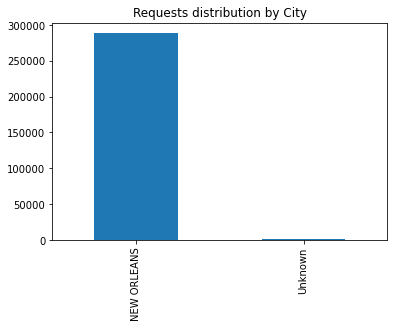

In [169]:
archive['city'].value_counts().plot(kind='bar', title = 'Requests distribution by City')

Confirmed that `archive` does not have records cities other than New Orleans, so the 'unknown' is more likely to be data discrepancy. This field may be empty/unknown for those records that are missing an address.

In [170]:
# save those 1573 values that are unique to 'archive' to take a closer look at it
archive_unique_values = outer[outer['Date Created'].isna()]
archive_unique_values

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,...,ticket_status,issue_description,street_address,neighborhood_district,council_district,city,state,zip_code,closure_reason,case_title
595097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,Issue: Outage Or Cycling | Pole number: S104,NaN,Unknown,Unknown,Unknown,LA,NaN,Case is Invalid,Streetlight - Outage Or Cycling
595098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,NaN,NaN,Unknown,Unknown,Unknown,LA,NaN,Case is Invalid,NORDC - Park Complaint
595099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Open,Location: nordcParks.eastone | Cleanup: Yes | ...,NaN,Unknown,Unknown,Unknown,LA,NaN,NaN,NORDC - Park Maintenance
595100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,Description of item: tree limbs,4225 LAUREL ST,EAST RIVERSIDE,B,NEW ORLEANS,LA,70115.0,Case Resolved,Large Item Trash/Garbage Pickup
595101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,[Call 311 for details],NaN,Unknown,Unknown,Unknown,LA,NaN,NaN,NOLA 311 General Service Request
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,| Non-urgent issue: Outage Or Cycling | Pole n...,LAPEYROUSE ST & N DORGENOIS ST,SEVENTH WARD,D,NEW ORLEANS,LA,70119.0,NaN,Outage Or Cycling
596666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,Nature of request: New Recycling Cart,4914 LAINE AVE,PLUM ORCHARD,E,NEW ORLEANS,LA,70126.0,Case Resolved,New Recycling Cart
596667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,[Call 311 for details],NaN,Unknown,Unknown,Unknown,LA,NaN,Case Resolved,Finance - Revenue
596668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Closed,Location: nordcParks.harrell | Repair: Yes | N...,NaN,Unknown,Unknown,Unknown,LA,NaN,Case Resolved,NORDC - Park Maintenance


In [171]:
# How many records out of those archive-unique have the 'Unknown' city?
len(archive_unique_values[archive_unique_values['city'] == 'Unknown'])

863

In [172]:
print(f"\
{round(len(archive_unique_values[archive_unique_values['city'] == 'Unknown'])/archive_unique_values.shape[0]*100)}% \
of all archive-unique values have the 'Unknown' city.")
print(f"\
{round(archive_unique_values['street_address'].isna().sum()/archive_unique_values.shape[0]*100)}% \
of all archive-unique values have no street address.")

55% of all archive-unique values have the 'Unknown' city.
55% of all archive-unique values have no street address.


**Conclusion:** I am not interested in these archive-unique records. 
<br>
**Next Steps**<br>
1. Remove `city` and `state`, since they all going to be the same for all requests, so they do not add value.
2. Remove `neighborhood_district` and `street_address` - they will not be used in the further analysis
3. Merge the data using left join.

In [173]:
archive.drop(columns = ['city','state', 'neighborhood_district', 'street_address'], inplace = True)

## Left Join Merge

I am hoping to reuse my clean dataset from CHAPTER II, and I will try merging that data with the selected columns from the archived data. But first, I would like to check that Left Join behaves they way I expect it to.

I expect to see the following numbers in the Left Join merge:
- number of rows = `current` number of rows
- number of columns = `archive` + `current` - 1 (-1 is the the one that I will be joining on)
- number of null values in the `Service Request #` = 0
- number of null values in the `ticket_id` =
 <br>= `current` number of rows - (`archive` number of rows **- number of records that are unique to `archive`**)

In [174]:
print("To translate the above expectations to numbers:")
print(f"Expected number of rows = {current.shape[0]}")
print(f"Expected number of columns = {archive.shape[1] + current.shape[1]}")
print("Expected number of nulls in the 'Service Request #' = 0")
print(f"Expected number of nulls in the 'ticket_id' = \
{current.shape[0]-(archive.shape[0]-outer['Service Request #'].isna().sum())}")

To translate the above expectations to numbers:
Expected number of rows = 595097
Expected number of columns = 23
Expected number of nulls in the 'Service Request #' = 0
Expected number of nulls in the 'ticket_id' = 294256


In [175]:
left_join = pd.merge(left=current, right=archive,
         left_on='Service Request #',
         right_on='ticket_id',
         suffixes=("_current", "_archived"),
         how='left')

In [176]:
print(f"Actual number of rows = {left_join.shape[0]}")
print(f"Actual number of columns = {left_join.shape[1]}")
print(f"Actual number of nulls in 'Service Request #' = {left_join['Service Request #'].isna().sum()}")
print(f"Actual number of nulls in 'ticket_id' = {left_join['ticket_id'].isna().sum()}")

Actual number of rows = 595097
Actual number of columns = 23
Actual number of nulls in 'Service Request #' = 0
Actual number of nulls in 'ticket_id' = 294256


In [177]:
left_join.shape

(595097, 23)

In [178]:
left_join.head()

,Service Request #,Request Type,Request Reason,Date Created,Date Modified,Date Closed,Request Status,Responsible Agency,Address,Council District,...,ticket_id,issue_type,ticket_created_date_time,ticket_closed_date_time,ticket_status,issue_description,council_district,zip_code,closure_reason,case_title
0,2019-631621,NaN,NaN,11/06/2019 03:32:28 PM,11/06/2019 03:32:28 PM,NaN,Pending,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-830021,COVID-19,COVID-19 Business Non-Compliance,10/05/2021 09:40:15 PM,10/05/2021 09:40:16 PM,NaN,Pending,Safety and Permits,823 Fulton St,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-821555,Trash/Recycling,Missed Trash Pick-Up,09/15/2021 10:10:42 PM,12/15/2021 10:24:59 AM,12/15/2021 04:24:59 AM,Closed,Department of Sanitation,1672 Rousselin Dr,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-821553,Trash/Recycling,Missed Trash Pick-Up,09/15/2021 09:54:40 PM,12/15/2021 10:25:14 AM,12/15/2021 04:25:14 AM,Closed,Department of Sanitation,1334 Bartholomew St,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-821552,Trash/Recycling,Missed Trash Pick-Up,09/15/2021 09:46:53 PM,12/15/2021 10:25:55 AM,12/15/2021 04:25:55 AM,Closed,Department of Sanitation,1564 N Prieur St,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
len(left_join.columns)

23

In [180]:
# Reorganise the columns

left_join = left_join.loc[:, ['ticket_id',
                            'Service Request #',
                            'Date Created',
                            'ticket_created_date_time',
                            'Address',
                            'Council District',
                            'council_district',
                            'case_title',
                            'Request Type',
                            'issue_type',
                            'Request Reason',
                            'issue_description',
                            'Status',
                            'Request Status',
                            'ticket_status',
                            'Responsible Agency', 
                            'Date Modified',
                            'Date Closed',
                            'ticket_closed_date_time',
                            'closure_reason',
                            'zip_code',
                            'Longitude',
                            'Latitude'
                            ]]

In [181]:
# Make sure that I still have the same number columns and did not lose any in the step above
len(left_join.columns)

23

In [182]:
# Rename the remaining columns:
# for clarity - mark those variables that came from archive with "_old" at the end of the name
# for convenience - make all lower case and follow the same format
left_join.rename(columns={'ticket_id' : 'request_id_old',
                         'Service Request #' : 'request_id',
                         'Date Created' : 'faulty_dates',
                         'ticket_created_date_time' : 'date_created_old',
                         'Address' : 'address',
                         'Council District' : 'dist',
                         'council_district' : 'dist_old',
                         'case_title' : 'case_title_old',
                         'Request Type' : 'request_type',
                         'issue_type' : 'issue_type_old',
                         'Request Reason' : 'request_reason',
                         'issue_description' : 'issue_description_old',
                         'Status' : 'status',
                         'Request Status' : 'request_status',
                         'Responsible Agency' : 'responsible_agency',
                         'Date Modified' : 'date_modified',
                         'Date Closed' : 'date_closed',
                         'ticket_closed_date_time' : 'date_closed_old',
                         'closure_reason' : 'closure_reason_old',
                         'Latitude' : 'lat',
                         'Longitude' : 'lon'
                        }, inplace = True)

In [183]:
# One more time - make sure that I still have the same number columns and did not lose any in the step above
len(left_join.columns)

23

## Inspect `date_created`

In [184]:
# Save the two columns I will be working with: 'date_created_old', 'date_created'
dates = left_join[['date_created_old', 'faulty_dates']]
dates.head()

,date_created_old,faulty_dates
0,NaN,11/06/2019 03:32:28 PM
1,NaN,10/05/2021 09:40:15 PM
2,NaN,09/15/2021 10:10:42 PM
3,NaN,09/15/2021 09:54:40 PM
4,NaN,09/15/2021 09:46:53 PM


In [185]:
print(f"There are {dates['date_created_old'].isna().sum()} records that truly belong to the \
period of 2019-2022, and there \
are {left_join.shape[0] - dates['date_created_old'].isna().sum()} records that were created \
prior to Jan 2019, and 'Date Created' has to be corrected.")

There are 294256 records that truly belong to the period of 2019-2022, and there are 300841 records that were created prior to Jan 2019, and 'Date Created' has to be corrected.


In [186]:
# Confirm that 'Date Created' has no null values
left_join['faulty_dates'].isna().sum()

0

In [187]:
# Step 3 - remove time from both columns, as I will only be working with dates
dates['date_created_old'] = dates['date_created_old'].str.split().str[0]
dates['faulty_dates'] = dates['faulty_dates'].str.split().str[0]

C:\Users\nadia\AppData\Local\Temp/ipykernel_31848/1229609110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['date_created_old'] = dates['date_created_old'].str.split().str[0]
C:\Users\nadia\AppData\Local\Temp/ipykernel_31848/1229609110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dates['faulty_dates'] = dates['faulty_dates'].str.split().str[0]


In [188]:
# Remove time from both columns in left_join, as I will only be working with dates
left_join['date_created_old'] = left_join['date_created_old'].str.split().str[0]
left_join['faulty_dates'] = left_join['faulty_dates'].str.split().str[0]

In [189]:
# Are there any records where dates are the same? If so, how many?
(dates['faulty_dates'] == dates['date_created_old']).sum()

0

In [190]:
# To confirm my assumption that faulty date only belong to January 2019
# and no other dates are impacted,
# show all dates that appear in dates['faulty_date']

dates['faulty_dates'].value_counts()

01/02/2019    175991
01/01/2019    136754
09/13/2021       755
07/06/2021       701
06/30/2021       700
               ...  
10/06/2019        17
01/20/2019        16
12/25/2019        16
11/28/2019        10
05/10/2022         1
Name: faulty_dates, Length: 1226, dtype: int64

In [191]:
# Similarly, I would like to see distribution of values in 'date_created_old' by year

dates['date_created_old'].str[-4:].value_counts(ascending = True)

2012    27452
2014    40836
2013    40946
2015    41663
2016    47569
2017    49793
2018    52582
Name: date_created_old, dtype: int64

<AxesSubplot:title={'center':'Distribution of requests by Year 2012-2018'}, xlabel='Year', ylabel='Number of requests'>

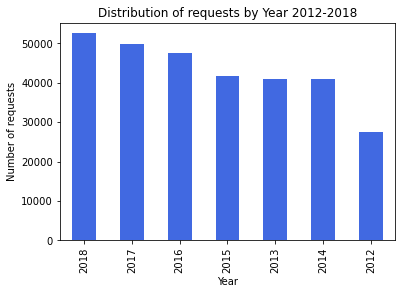

In [192]:
dates['date_created_old'].str[-4:].value_counts().plot(kind = 'bar', color = 'royalblue',
                                                       xlabel = 'Year',
                                                       ylabel = 'Number of requests',
                                                       title = 'Distribution of requests by Year 2012-2018')

## Create a new column for correct request dates

**Steps:**<br>
<br>
1. Remove time from both date columns
2. Create a new column `correct_date_created` based on  `date_created_old`
3. Fulfill the null values in `correct_date_created`based on `date_created`

In [193]:
# Create new colum and copy all values from 'date_created_old'
left_join['correct_date_created'] = left_join['date_created_old']

In [194]:
# Replace null values with dates from 'date_created'
left_join.loc[left_join['correct_date_created'].isna(), 'correct_date_created'] = left_join['faulty_dates']

In [195]:
# Remove the remaining two columns
left_join.drop(columns = ['faulty_dates', 'date_created_old'], inplace = True)

In [196]:
# Step 1 - for convenience, create a column of only the year when each request was created

# Step 1.1 - Split and leave date only

left_join['year_r_created'] = left_join['correct_date_created'].str.split().str[0]

In [197]:
left_join['year_r_created'] = left_join['year_r_created'].str.split('/').str[2]

In [198]:
# Step 2 - Show the new distribution of values by year
left_join['year_r_created'].value_counts()

2021    96310
2019    91498
2020    78749
2018    52582
2017    49793
2016    47569
2015    41663
2013    40946
2014    40836
2022    27699
2012    27452
Name: year_r_created, dtype: int64

Above is what I expcted to see in the first place. I will come back to this section when I get to Exporatory Data Analysis. Now I will move on to check and compare other variables. I suspect that the date when the request was created may not be the only variable that suffered in the most recent data set.

#### Apply the same technique to  `date_closed` to ensure consistency within the new dataset

In [199]:
# Create new column and copy all values from 'date_created_old'
left_join['date_closed_new'] = left_join['date_closed_old']

In [200]:
# replace null values with dates from 'date_created'
left_join.loc[left_join['date_closed_new'].isna(), 'date_closed_new'] = left_join['date_closed']

In [201]:
left_join.drop(columns = ['date_closed', 'date_closed_old'],inplace = True)

In [202]:
# Check
left_join.columns

Index(['request_id_old', 'request_id', 'address', 'dist', 'dist_old',
       'case_title_old', 'request_type', 'issue_type_old', 'request_reason',
       'issue_description_old', 'status', 'request_status', 'ticket_status',
       'responsible_agency', 'date_modified', 'closure_reason_old', 'zip_code',
       'lon', 'lat', 'correct_date_created', 'year_r_created',
       'date_closed_new'],
      dtype='object')

## Request status / reason / title

I would like to have a better understanding of values in these columns and how/if they're connected.<br>

|<center> Columns of interest:   </center>|<center>Possible analog  </center>|
|-----------------------------------------|----------------------------------|
|<center>`closure_reason_old`    </center>|<center>`status`         </center>|
|<center>`case_title_old`        </center>|<center> `request_reson`  </center>|
|<center>`issue_type_old`        </center>|<center>`request_type` </center>|
|<center>`issue_description_old` </center>|<center>`request_status` </center>|

## `closure_reason_old` vs `status`

**<center>`status`</center>**

In [203]:
print("status")
print(f"Number of missing values: {left_join['status'].isna().sum()} records.")
print(f"Missing values make \
{round(left_join['status'].isna().sum()/(left_join['status'].isna().sum()+left_join['status'].notnull().sum())*100,2)}\
% of the total number of records in the variable.")
print(f"Number of categories: {len(left_join['status'].value_counts())}.")
print(f"List of categories:")
print(f"{left_join['status'].value_counts()}")

status
Number of missing values: 490095 records.
Missing values make 82.36% of the total number of records in the variable.
Number of categories: 34.
List of categories:
Resolved                                         50077
Pending                                          27746
Assigned to Contractor                            9817
Inspected                                         5856
Duplicate Case                                    4114
Referred to Code Enforcement                      1909
Invalid Case                                      1804
Referred to External Agency                       1373
Reviewed                                          1033
Duplicate Request                                  276
Unfounded                                          136
Referred to Property Owner                         127
Not Enough Information- Resubmittal Required       125
Captured by Project                                117
Wrong Agency                                        84
Inval

**<center>`closure_reason_old`</center>**

In [204]:
print("closure_reason_old")
print(f"Number of missing values: {left_join['closure_reason_old'].isna().sum()} records.")
print(f"Missing values make \
{round(left_join['closure_reason_old'].isna().sum()/(left_join['closure_reason_old'].isna().sum()+left_join['closure_reason_old'].notnull().sum())*100,2)}\
% of the total number of records in the variable.")
print(f"Number of categories: {len(left_join['closure_reason_old'].value_counts())}.")
print(f"List of categories:")
print(f"{left_join['closure_reason_old'].value_counts()}")

closure_reason_old
Number of missing values: 340727 records.
Missing values make 57.26% of the total number of records in the variable.
Number of categories: 3.
List of categories:
Case Resolved      232494
Case is Invalid     21875
Case Cancelled          1
Name: closure_reason_old, dtype: int64


**Observations:**<br>
- Both variables have outstanding number of null values.
    - I would like to see the distribution of nulls in 'status' to see if there is any connection to 2015 and 2017, that were missing a lot of requests in the clean data (I may have deleted too many).
- Surprising number of Invalid cases in `closure_reason_old`
    - I would like to see distribution of 'invalid cases' in `closure_reason_old`
- The common values that connect the two variables is that both have invalid, resolved, and cancelled cases. 

In [205]:
# Is there a pattern on the distribution of invalid cases by year?
invalid_cases = left_join[['year_r_created', 'closure_reason_old', 'status']]
invalid_cases.sample()

,year_r_created,closure_reason_old,status
350498,2012,Case is Invalid,NaN


In [206]:
# Leave only 'Invalid Cases' for inspection
closure_reason_old = invalid_cases[(invalid_cases['closure_reason_old'] != 'Case Cancelled') & (invalid_cases['closure_reason_old'] != 'Case Resolved') & (invalid_cases['closure_reason_old'].notnull())]

In [207]:
# Check

closure_reason_old.shape

(21875, 3)

In [208]:
# Another check

closure_reason_old['closure_reason_old'].value_counts()

Case is Invalid    21875
Name: closure_reason_old, dtype: int64

In [209]:
# Last check

closure_reason_old.sample()

,year_r_created,closure_reason_old,status
485848,2017,Case is Invalid,NaN


In [210]:
closure_reason_old_distribution = closure_reason_old.groupby(['year_r_created', 'closure_reason_old']).size().to_frame('size')
closure_reason_old_distribution

,,size
year_r_created,closure_reason_old,
2012,Case is Invalid,3629
2013,Case is Invalid,2760
2014,Case is Invalid,2677
2015,Case is Invalid,2535
2016,Case is Invalid,2654
2017,Case is Invalid,3422
2018,Case is Invalid,4198


The distribution of `Invalid requests` is pretty even with no dip at 2015 or 2017. Expectedly, there are no values past 2018 as this variable comes from the 2012 - 2018 table.

In [211]:
# What 'status' category is assigned to case that is marked as 'Case is Invalid' in 'closure_reason_old'?
status_vs_reason = left_join.groupby(['closure_reason_old', 'status']).size().to_frame('size')
status_vs_reason

,,size
closure_reason_old,status,
Case Resolved,Resolved,27
Case is Invalid,Resolved,1


Only 27 cases overlap. Let's see what cases are those.

In [212]:
overlap = left_join[(left_join['closure_reason_old'] == 'Case Resolved') & (left_join['status'] == 'Resolved')]
overlap

,request_id_old,request_id,address,dist,dist_old,case_title_old,request_type,issue_type_old,request_reason,issue_description_old,...,ticket_status,responsible_agency,date_modified,closure_reason_old,zip_code,lon,lat,correct_date_created,year_r_created,date_closed_new
93130,101000893702,101000893702,"Mejia, Steven NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 07:56:07 AM,Case Resolved,NaN,0.0,0.0,12/20/2018,2018,12/20/2018 10:10:25 AM
93131,101000893526,101000893526,"Glynn, Terri NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 07:56:36 AM,Case Resolved,NaN,0.0,0.0,12/19/2018,2018,12/20/2018 08:20:46 AM
93133,101000893333,101000893333,"FASSBENDER, RAQUEL NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 08:04:46 AM,Case Resolved,NaN,0.0,0.0,12/19/2018,2018,12/19/2018 09:57:30 AM
93134,101000893254,101000893254,"Sohrenssen, Judi NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 08:05:10 AM,Case Resolved,NaN,0.0,0.0,12/18/2018,2018,12/19/2018 08:17:38 AM
93135,101000893238,101000893238,"Sbashnig, Nicole NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 08:05:41 AM,Case Resolved,NaN,0.0,0.0,12/18/2018,2018,12/19/2018 09:57:52 AM
93136,101000892991,101000892991,"Orgeron, Earl NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 08:06:33 AM,Case Resolved,NaN,0.0,0.0,12/18/2018,2018,12/21/2018 08:38:20 AM
93139,101000892882,101000892882,"Spencer, Rachel NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 08:07:02 AM,Case Resolved,NaN,0.0,0.0,12/17/2018,2018,12/21/2018 08:30:02 AM
93140,101000892871,101000892871,"Ross, Kathy NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 08:07:26 AM,Case Resolved,NaN,0.0,0.0,12/17/2018,2018,12/18/2018 08:15:36 AM
93141,101000892838,101000892838,"Marx, Denise NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 08:07:54 AM,Case Resolved,NaN,0.0,0.0,12/17/2018,2018,12/17/2018 03:12:40 PM
93142,101000892781,101000892781,"B, Jai NEW ORLEANS LOUISIANA",NaN,NaN,Finance - Revenue,Tax and Revenue,General Service Request,General Tax Question,[Call 311 for details],...,Closed,Bureau of Revenue,04/14/2022 08:08:42 AM,Case Resolved,NaN,0.0,0.0,12/17/2018,2018,12/17/2018 02:04:20 PM


27 requests all from 2018 and all are regarding Tax and Revenue. Now let's see the distribution of null values across `status`.

In [213]:
# Is the rest of 'status values' nulls when it comes to 'closure_reason_old' == 'Case is invalid'?
invalid_cases_status_null = invalid_cases[invalid_cases['status'].isna()]

In [214]:
# Check
invalid_cases_status_null.sample()

,year_r_created,closure_reason_old,status
581733,2013,Case Resolved,NaN


In [215]:
# To avoid an error 'A value is trying to be set on a copy of a slice from a DataFrame.' in the next cell:
invalid_cases_status_null = invalid_cases_status_null.copy()

In [216]:
# Turn the nulls into something 'tangible' so that I can 'grab' and display them:
invalid_cases_status_null['status'] = invalid_cases_status_null['status'].fillna('NULLS').copy()

In [217]:
# Show distribution of 'issue_type_old' nulls grouped by year
invalid_cases_status_null = invalid_cases_status_null[invalid_cases_status_null['status'] == 'NULLS'].groupby(['year_r_created']).size().to_frame('size')
invalid_cases_status_null

,size
year_r_created,
2012,27422
2013,40941
2014,40833
2015,41662
2016,47567
2017,49793
2018,52526
2019,90375
2020,77350


**Conclusion:**<br> 
While there is still a lot of null values in `status`, I could at least fulfill the ones that come from 2012 - 2018 period.<br>

**Next Step:**<br>
Create a new column that would combine values from both `status` and `closure_reason_old`:
- First, copy all values from the most recent data set's variable - `status`, then when there are nulls, look for values in `closure_reason_old`. This step will not eliminate all my nulls, but will reduce the numbers significantly. 
- Second, remove `status` and `closure_reason_old`

In [218]:
# Create new column and copy all values from 'closure_reason_old'

left_join['correct_status'] = left_join['status']

In [219]:
# replace null values with dates from 'date_created'
left_join.loc[left_join['correct_status'].isna(), 'correct_status'] = left_join['closure_reason_old']

In [220]:
# Now I can remove `closure_reason_old` and `status`
left_join.drop(columns = ['status', 'closure_reason_old'], inplace = True)

|<center> Columns of interest:       </center>|<center>Possible analog             </center>|Checked|
|---------------------------------------------|---------------------------------------------|-------|
|<center>replaced by 'correct_status'</center>|<center>replaced by 'correct_status'</center>|✅     |
|<center>`case_title_old`            </center>|<center> `request_reson`            </center>|⬜️     |
|<center>`issue_type_old`            </center>|<center>`request_type`              </center>|⬜️     |
|<center>`issue_description_old`     </center>|<center>`request_status`            </center>|⬜️     |

Onto the next pair:

## `case_title_old` vs `request_reason`

**<center>`case_title_old`</center>**

In [221]:
print("case_title_old")
print(f"Number of missing values: {left_join['case_title_old'].isna().sum()} records.")
print(f"Missing values make \
{round(left_join['case_title_old'].isna().sum()/(left_join['case_title_old'].isna().sum()+left_join['case_title_old'].notnull().sum())*100,2)}\
% of the total number of records in the variable.")
print(f"Number of categories: {len(left_join['case_title_old'].value_counts())}.")
print(f"List of categories:")
print(f"{left_join['case_title_old'].value_counts()}")

case_title_old
Number of missing values: 294265 records.
Missing values make 49.45% of the total number of records in the variable.
Number of categories: 270.
List of categories:
Code Enforcement General Request                               44750
Streetlight - Outage Or Cycling                                26622
Large Item Trash/Garbage Pickup                                24863
New Recycling Cart                                             22794
Abandoned Vehicle Stickered (5-day sticker)                    12465
                                                               ...  
MARSHAL FOCH (District A)                                          1
LAGAN TEST - PLEASE IGNORE NOLA 311 General Service Request        1
Code Enforcement General Request (District B)                      1
Public Works (Fourth Notification)                                 1
Mazant (District D)                                                1
Name: case_title_old, Length: 270, dtype: int64


**<center>`request_reason`</center>**

In [222]:
print("request_reason")
print(f"Number of missing values: {left_join['request_reason'].isna().sum()} records.")
print(f"Missing values make \
{round(left_join['request_reason'].isna().sum()/(left_join['request_reason'].isna().sum()+left_join['request_reason'].notnull().sum())*100,2)}\
% of the total number of records in the variable.")
print(f"Number of categories: {len(left_join['request_reason'].value_counts())}.")
print(f"List of categories:")
print(f"{left_join['request_reason'].value_counts()}")

request_reason
Number of missing values: 1779 records.
Missing values make 0.3% of the total number of records in the variable.
Number of categories: 120.
List of categories:
Property Maintenance                                                    71014
Request a Large Item Pick Up                                            60484
Abandoned/Junk Vehicles                                                 56713
Street Light Outage/Malfunction                                         47514
Order Recycling Cart                                                    36710
Missed Trash Pick-Up                                                    26483
Pothole                                                                 24051
Illegal Dumping                                                         23500
Drainage Issue (Catch Basins, Culverts, Ditches, and Manhole Covers)    23175
Order Trash Cart                                                        21330
Request Tree Service (Right of Way/Public Pro

**Observation and conclusion:** These columns contain the same metrics. Both have large number of categories. I am not sure if this column will be used for my analysis yet, but if so, I would use `request_reason` because it has less than 1% of null values. For this reason, I can safely remove its equivalent columns - `case_title_old`.

In [223]:
left_join.drop(columns = ['case_title_old'], inplace = True)

|<center> Columns of interest:       </center>|<center>Possible analog  </center>           |Checked|
|---------------------------------------------|---------------------------------------------|-------|
|<center>replaced by 'correct_status'</center>|<center>replaced by 'correct_status'</center>|✅     |
|<center>(removed)                   </center>|<center> `request_reson` </center>           |✅     |
|<center>`issue_type_old`            </center>|<center>`request_type`   </center>           |⬜️     |
|<center>`issue_description_old`     </center>|<center>`request_status` </center>           |⬜️     |

## `issue_type_old` vs `request_type`

**<center>`issue_type_old`</center>**

In [224]:
print("issue_type_old")
print(f"Number of missing values: {left_join['issue_type_old'].isna().sum()} records.")
print(f"Missing values make \
{round(left_join['issue_type_old'].isna().sum()/(left_join['issue_type_old'].isna().sum()+left_join['issue_type_old'].notnull().sum())*100,2)}\
% of the total number of records in the variable.")
print(f"Number of categories: 'issue_type_old' has {len(left_join['issue_type_old'].value_counts())}.")
print(f"List of categories:")
print(f"{left_join['issue_type_old'].value_counts()}")


issue_type_old
Number of missing values: 294256 records.
Missing values make 49.45% of the total number of records in the variable.
Number of categories: 'issue_type_old' has 33.
List of categories:
Code Enforcement General Request       44763
Street Light                           36536
Trash/Garbage Pickup                   35435
Abandoned Vehicle Reporting/Removal    31575
Residential Recycling Programs         27103
Large Item Trash/Garbage Pickup        24865
Pothole/Roadway Surface Repair         16804
General Service Request                12710
Illegal Dumping Reporting              11695
Catch Basin Maintenance                 9423
Street Flooding/Drainage                9025
Tree Service                            8406
Traffic Sign                            4501
Traffic Signal                          4277
Rodent Complaint                        3656
Sidewalk Repair                         3136
Subsidence                              3020
Tree Service Emergency              

**<center>`request_type`</center>**

In [225]:
print("request_type")
print(f"Number of missing values: {left_join['request_type'].isna().sum()} records.")
print(f"Missing values make \
{round(left_join['request_type'].isna().sum()/(left_join['request_type'].isna().sum()+left_join['request_type'].notnull().sum())*100,2)}\
% of the total number of records in the variable.")
print(f"Number of categories: 'request_type' has {len(left_join['request_type'].value_counts())}.")
print(f"List of categories:")
print(f"{left_join['request_type'].value_counts()}")


request_type
Number of missing values: 1757 records.
Missing values make 0.3% of the total number of records in the variable.
Number of categories: 'request_type' has 17.
List of categories:
Trash/Recycling                                235887
Roads/Drainage                                  77145
Traffic Signals/Signs/Striping/Streetlights     75376
Property Maintenance                            70955
Abandoned Vehicles                              58202
Parks & Parkways                                22992
Tax and Revenue                                 12087
Taxi Issues                                      9439
Mosquito, Termite & Rodent Control               9095
COVID-19                                         6939
Safety & Permits                                 6017
General Services                                 3768
Health Related Questions                         3750
Mayor's Request                                   818
EMS                                               663

**Observation and Conclusion:**<br>
It does look like these two columns are interchangeable, but `request_type` has less than 1% of nulls, while in`issue_type_old` nulls make almost 50% of the values. It would be preferable to keep only one column and avoid unnecessary data cleaning if possible. But before I conclude that `issue_type_old` can be removed, I would like to see if `request_type` makes sense when it comes to its categories' connection specific `responsible_agency`. Ideally, I would like to see distinct boundaries between areas of responsibility for each Agency. It would not be preferable if one category splits between two agencies or more. 

In [226]:
# Show a relationship between 'request_types' and 'responsible agency'
request_type_distribution = left_join.groupby(['request_type', 'responsible_agency']).size().to_frame('size')
request_type_distribution

size
request_type                                responsible_agency                                        
Abandoned Vehicles                          Department of Code Enforcement                           3
                                            Department of Parks & Parkway                            1
                                            Department of Public Works                           58168
                                            Department of Sanitation                                 1
                                            Executive Office of the Mayor                            1
                                            New Orleans Office of Homeland Security & Emerg...       1
COVID-19                                    Bureau of Revenue                                        2
                                            Department of Code Enforcement                        1441
                                            Department of Public Works                               1
                                            Health Department                                        3
                                            Orleans Parish Communication District                    1
                                            Safety and Permits                                    5490
EMS                                         Department of Public Works                               1
                                            Emergency Medical Services                             661
                                            Health Department                                        1
Hard Rock Hotel Collapse                    Health Department                                       27
                                            New Orleans Fire Department                             13
                                            Office of Community and Economic Development            17
Health Related Questions                    Department of Code Enforcement                           3
                                            Health Department                                     3708
                                            Office of Community and Economic Development             6
                                            Orleans Parish Communication District                    6
                                            Safety and Permits                                       1
Law Enforcement Services                    Office of Police Secondary Employment                  143
                                            Orleans Parish Communication District                    2
                                            Safety and Permits                                       1
Mayor's Request                             Department of Code Enforcement                          22
                                            Department of Property Management                       16
                                            Department of Public Works                              21
                                            Department of Sanitation                                19
                                            Emergency Medical Services                               1
                                            Executive Office of the Mayor                          717
                                            Ground Transportation Bureau                             1
                                            Health Department                                        2
                                            Mosquito, Termite & Rodent Control Board                 1
                                            Office of Community and Economic Development            12
                                            Safety and Permits                                       3
Mosquito, Termite & Rodent Control          Bureau of Revenue                    

The distribution looks pretty good. Just for our information, check what this distribution looks like for `issue_type_old`:

In [227]:
# Show a relationship between 'request_types' and 'responsible agency'
request_type_distribution = left_join.groupby(['issue_type_old', 'responsible_agency']).size().to_frame('size')
request_type_distribution

size
issue_type_old                      responsible_agency                             
Abandoned Vehicle Reporting/Removal Department of Public Works                31575
Catch Basin Maintenance             Department of Public Works                 9423
Code Enforcement General Request    Department of Code Enforcement            44751
                                    Department of Public Works                    6
                                    Department of Sanitation                      1
                                    Mosquito, Termite & Rodent Control Board      4
Curb Repair                         Department of Public Works                  262
Dead Animal Pickup                  Department of Sanitation                   1511
General Service Request             Bureau of Revenue                          8806
                                    Department of Code Enforcement              314
Grass Service                       Department of Parks & Parkway               792
Illegal Dumping Reporting           Department of Code Enforcement                7
                                    Department of Public Works                    3
                                    Department of Sanitation                  11685
Large Item Trash/Garbage Pickup     Department of Sanitation                  24865
Manhole Cover Maintenance           Department of Public Works                 1191
Mosquito Control                    Mosquito, Termite & Rodent Control Board   2473
NORDC Grass Service                 Department of Parks & Parkway                52
Non Rodent Complaint                Mosquito, Termite & Rodent Control Board    359
Park Maintenance                    Department of Parks & Parkway                 1
Pothole/Roadway Surface Repair      Department of Public Works                16803
                                    Department of Sanitation                      1
Residential Recycling Programs      Department of Sanitation                  27101
Road Shoulder Repair                Department of Public Works                  987
Road Surface Marking                Department of Public Works                  508
Rodent Complaint                    Mosquito, Termite & Rodent Control Board   3656
Sidewalk Repair                     Department of Public Works                 3136
Street Flooding/Drainage            Department of Public Works                 9025
Street Light                        Department of Public Works                36535
Street Name Sign                    Department of Public Works                 1547
Subsidence                          Department of Public Works                 3020
Traffic Sign                        Department of Public Works                 4501
Traffic Signal                      Department of Public Works                 4277
Trash/Garbage Pickup                Department of Sanitation                  35435
Tree Maintenance                    Department of Parks & Parkway              1204
Tree Service                        Department of Parks & Parkway              8406
Tree Service Emergency              Department of Parks & Parkway              2498

I was worried that `request_type` may be not granular enough (17 categories), but now, looking at more detailed variable `issue_type_old` (33 categories), I observe overlap in responsible agencies. For example, my data set would not have lost anything if certain categories were combined, as they are very similar and come down to the same Responsible Agency.<br>
**Conclusion:**<br>
Remove `issue_type_old`.

In [228]:
left_join.drop(columns = ['issue_type_old'], inplace = True)

|<center> Columns of interest:       </center>|<center>Possible analog  </center>           |Checked|
|---------------------------------------------|---------------------------------------------|-------|
|<center>replaced by 'correct_status'</center>|<center>replaced by 'correct_status'</center>|✅     |
|<center>(removed)                   </center>|<center> `request_reson` </center>           |✅     |
|<center>(removed)                   </center>|<center>`request_type`   </center>           |✅     |
|<center>`issue_description_old`     </center>|<center>`request_status` </center>           |⬜️     |

## `issue_description_old` vs `request_status`

**<center>`issue_description_old`</center>**

In [229]:
print("issue_description_old")
print(f"Number of missing values: {left_join['issue_description_old'].isna().sum()} records.")
print(f"Missing values make \
{round(left_join['issue_description_old'].isna().sum()/(left_join['issue_description_old'].isna().sum()+left_join['issue_description_old'].notnull().sum())*100,2)}\
% of the total number of records in the variable.")
print(f"Number of categories: 'issue_description_old' has {len(left_join['issue_description_old'].value_counts())}.")
print(f"List of categories:")
print(f"{left_join['issue_description_old'].value_counts()}")


issue_description_old
Number of missing values: 308372 records.
Missing values make 51.82% of the total number of records in the variable.
Number of categories: 'issue_description_old' has 93991.
List of categories:
Nature of request: New Recycling Cart                                                                                                              22726
[Call 311 for details]                                                                                                                             12710
Issue: Missed Collection                                                                                                                            9830
Street area affected: Travel Lane / Roadway | Running water: No | Standing Water: No | Rocks: No                                                    6749
| Is there standing water: Yes | Is it: Clogged                                                                                                     5291
                   

**<center>`request_status`</center>**

In [230]:
print("request_status")
print(f"Number of missing values: {left_join['request_status'].isna().sum()} records.")
print(f"Missing values make \
{round(left_join['request_status'].isna().sum()/(left_join['request_status'].isna().sum()+left_join['request_status'].notnull().sum())*100,2)}\
% of the total number of records in the variable.")
print(f"Number of categories: 'request_status' has {len(left_join['request_status'].value_counts())}.")
print(f"List of categories:")
print(f"{left_join['request_status'].value_counts()}")

request_status
Number of missing values: 0 records.
Missing values make 0.0% of the total number of records in the variable.
Number of categories: 'request_status' has 2.
List of categories:
Closed     518826
Pending     76271
Name: request_status, dtype: int64


**Observation and Conclusion:**<br>
- `issue_description_old` and `request_status` are different columns and store different information, so I will not be comparing them, but evaluate separately.
- `issue_description_old` is not usefull for my analysis, becaused based on the number of null values and the fact that it comes from 2012 -2018, it is missing the last three years of input. Additionally, it would not make a lot of sense trying to replace these values, because it looks mostly like resident's comments on their requests. 
- `request_status` is going to be very useful. It has no nulls, and it tells me whether a request has been satisfied or is pending.
- there is a similarly named column - `status`, and it becomes confusing. Because `status` has more categories that are descriptive to the request, I will rename `status` to `tags`
<br>
**Next Steps:**
- Remove `issue_description_old`
- Rename `status`

In [231]:
left_join.drop(columns = ['issue_description_old'], inplace = True)

In [232]:
left_join.rename(columns={'correct_status' : 'tags'}, inplace = True) # 'status' was actually replaced by 'correct status'
left_join.sample()

,request_id_old,request_id,address,dist,dist_old,request_type,request_reason,request_status,ticket_status,responsible_agency,date_modified,zip_code,lon,lat,correct_date_created,year_r_created,date_closed_new,tags
550605,101000361237,101000361237,1007 DESIRE ST NEW ORLEANS LOUISIANA 70117,NaN,C,"Mosquito, Termite & Rodent Control",Mosquito Complaint,Closed,Closed,"Mosquito, Termite & Rodent Control Board",03/23/2020 09:59:28 PM,70117.0,-90.040524,29.965739,02/10/2015,2015,02/12/2015 11:45:30 AM,Case Resolved


|<center> Columns of interest:       </center>|<center>Possible analog  </center>           |Checked|
|---------------------------------------------|---------------------------------------------|-------|
|<center>replaced by 'tags'          </center>|<center>replaced by 'tags'          </center>|✅     |
|<center>(removed)                   </center>|<center> `request_reason` </center>          |✅     |
|<center>(removed)                   </center>|<center>`request_type`   </center>           |✅     |
|<center>(removed)                   </center>|<center>`request_status` </center>           |✅     |

# District

In [233]:
print(f"'Council District' was the next column I had the most issues cleaning, as it had \
{round(df0['Council District'].isna().mean()*100)}%\
 of its values missing. So far I was able to fill some of the missing data using equivalent\
 columns from the earlier data set. My hopes are that this would work for the districts as well.")

'Council District' was the next column I had the most issues cleaning, as it had 55% of its values missing. So far I was able to fill some of the missing data using equivalent columns from the earlier data set. My hopes are that this would work for the districts as well.


I observe a pattern where variables with a lot of null values in the current data set have the null values grouped within the 2012 - 2018 period. When that's the case, like with `closure_reson_old` and `status`, the null values could be fulfilled with the information stored in archived dataset only if I find a variable that is interchangeable with the current dataset's variable. Therefore, I would like to revisit the Council District variable - `dist` and `dist_old`.

In [234]:
# I want to see if the archive dataset has more records with district filled in
# Then I could fulfill the missing values in my current data set more efficiently
dist = left_join[['dist', 'dist_old']]

In [235]:
# I expect that most of the records would be the same 
# Show how many records have same values in dist and dist_old
(dist['dist'] == dist['dist_old']).sum()

419

In [236]:
# Show this number a % of the total number of records
print(f"Between archived and current data sets, only {round((dist['dist'] == dist['dist_old']).sum()/dist.shape[0]*100,2)}% of records are consistent in what district was assigned to each request.")

Between archived and current data sets, only 0.07% of records are consistent in what district was assigned to each request.


If the situation with district is is similar to other cases that we have seen above, this low number may be explained if `dist_old` has its values distributed between 2012 - 2018, and `dist` perhaps has less values within this period. The 419 is how many cases overlap (or got transferred from one data set to another). 

In [237]:
dist_old_distribution = left_join.groupby(['year_r_created', 'dist_old']).size().to_frame('size')
dist_old_distribution

size
year_r_created dist_old       
2012           A          6258
               B          5064
               C          4640
               D          6568
               E          4462
2013           A          8667
               B          8034
               C          6723
               D          8954
               E          6816
2014           A          8571
               B          9053
               C          6455
               D          9462
               E          6435
2015           A          8988
               B          9116
               C          5780
               D          8986
               E          5655
2016           A         10624
               B         10376
               C          7121
               D         10791
               E          6303
2017           A         10808
               B         10680
               C          7742
               D         11679
               E          6883
2018           A         11054
               B         11646
               C          8393
               D         11996
               E          7279

In [238]:
dist_distribution = left_join.groupby(['year_r_created', 'dist']).size().to_frame('size')
dist_distribution

size
year_r_created dist       
2012           A        18
               B        66
               C         2
               D         1
               E         3
2013           A         5
               B        14
               C         1
               D         1
               E         3
2014           A         6
               B        26
               C         9
               D         1
               E         2
2015           A         8
               B        21
               C         2
               D         1
2016           A         8
               B        20
               C         4
               D         1
               E         2
2017           A        10
               B        21
               C         4
               D         1
2018           A        31
               B        67
               C        30
               D        22
               E        14
2019           A     15914
               B     17679
               C     11376
               D     15487
               E      9571
2020           A     17569
               B     19586
               C     13320
               D     16747
               E     10324
2021           A     21297
               B     19899
               C     16816
               D     22423
               E     14735
2022           A      6240
               B      7641
               C      4668
               D      5222
               E      3181

Very few values (presumably 419) got transferred from 2012 - 2018 period into 2012 - Present dataset. Similarly, I will combine the values from both periods into a new column - `dist_correct`. I have to chose where to take the values that overlap - `dist` or `dist_old`. Because `dist_old` had some duplicated where one request was associated with two diferent districts, I will take the overlapping values from `dist`. 

In [239]:
# copy values from 'dist' into a new column
left_join['correct_dist'] = left_join['dist']

In [240]:
# replace the null values with the values from 'dist'
left_join.loc[left_join['correct_dist'].isna(), 'correct_dist'] = left_join['dist_old']

In [241]:
# Check
correct_dist_distribution = left_join.groupby(['year_r_created', 'correct_dist']).size().to_frame('size')
correct_dist_distribution

size
year_r_created correct_dist       
2012           A              6259
               B              5063
               C              4640
               D              6567
               E              4463
2013           A              8666
               B              8034
               C              6723
               D              8955
               E              6816
2014           A              8571
               B              9053
               C              6455
               D              9462
               E              6435
2015           A              8988
               B              9116
               C              5780
               D              8986
               E              5655
2016           A             10623
               B             10377
               C              7121
               D             10791
               E              6303
2017           A             10808
               B             10680
               C              7741
               D             11680
               E              6883
2018           A             11054
               B             11646
               C              8393
               D             11996
               E              7279
2019           A             15914
               B             17679
               C             11376
               D             15487
               E              9571
2020           A             17569
               B             19586
               C             13320
               D             16747
               E             10324
2021           A             21297
               B             19899
               C             16816
               D             22423
               E             14735
2022           A              6240
               B              7641
               C              4668
               D              5222
               E              3181

This information will very useful for my future analysis. I can clean up the other two district columns and move on.

In [242]:
left_join.drop(columns = ['dist', 'dist_old'], inplace = True)

In [243]:
# Review my new data set
left_join.sample()

,request_id_old,request_id,address,request_type,request_reason,request_status,ticket_status,responsible_agency,date_modified,zip_code,lon,lat,correct_date_created,year_r_created,date_closed_new,tags,correct_dist
107785,NaN,2021-779959,924 N Dupre St,Trash/Recycling,Request a Large Item Pick Up,Closed,NaN,Department of Sanitation,06/02/2021 04:54:47 AM,NaN,-90.083313,29.974052,05/26/2021,2021,NaN,NaN,A


In [244]:
# remove 'request_id_old' I no longer need it for verification:
left_join.drop(columns = ['request_id_old'], inplace = True)

In [245]:
left_join.columns

Index(['request_id', 'address', 'request_type', 'request_reason',
       'request_status', 'ticket_status', 'responsible_agency',
       'date_modified', 'zip_code', 'lon', 'lat', 'correct_date_created',
       'year_r_created', 'date_closed_new', 'tags', 'correct_dist'],
      dtype='object')

In [246]:
# Once again reorganise the data set, to place the newly created columns in a more intuitive position:

In [247]:
left_join = left_join[['request_id', 'year_r_created', 'correct_dist', 'responsible_agency','request_type', 'correct_date_created',
       'request_status',  'date_closed_new',
       'tags', 'date_modified', 'request_reason', 'address', 'lat', 'lon', ]]
left_join.sample()

,request_id,year_r_created,correct_dist,responsible_agency,request_type,correct_date_created,request_status,date_closed_new,tags,date_modified,request_reason,address,lat,lon
213750,2019-636720,2019,NaN,Ground Transportation Bureau,Taxi Issues,12/09/2019,Closed,NaN,NaN,05/27/2020 10:39:20 PM,Taxi Lost & Found Item,NaN,0.0,0.0


In [248]:
# Rename some of the columns to have it more simple and workable
# Rename 'year_r_created' to just 'year' it is leass descriptive,
# but much easier to use and I have no othe years in the data set yet
left_join.rename(columns={'request_id' : 'id', 
                        'year_r_created' : 'year',
                        'correct_dist' : 'dist', 
                        'responsible_agency' : 'agency', 
                        'request_type' : 'type',
                        'request_reason' : 'reason',
                        'request_status' : 'status',
                        'correct_date_created' : 'date_requested',
                        'date_closed_new' : 'date_closed', 
                        'issue_description_old': 'issue_description_old'
                       }, inplace = True)

In [249]:
left_join.head()

,id,year,dist,agency,type,date_requested,status,date_closed,tags,date_modified,reason,address,lat,lon
0,2019-631621,2019,NaN,NaN,NaN,11/06/2019,Pending,NaN,NaN,11/06/2019 03:32:28 PM,NaN,NaN,0.000000,0.000000
1,2021-830021,2021,B,Safety and Permits,COVID-19,10/05/2021,Pending,NaN,Pending,10/05/2021 09:40:16 PM,COVID-19 Business Non-Compliance,823 Fulton St,29.943975,-90.065412
2,2021-821555,2021,D,Department of Sanitation,Trash/Recycling,09/15/2021,Closed,12/15/2021 04:24:59 AM,Resolved,12/15/2021 10:24:59 AM,Missed Trash Pick-Up,1672 Rousselin Dr,29.979937,-90.073291
3,2021-821553,2021,D,Department of Sanitation,Trash/Recycling,09/15/2021,Closed,12/15/2021 04:25:14 AM,Resolved,12/15/2021 10:25:14 AM,Missed Trash Pick-Up,1334 Bartholomew St,29.968404,-90.034680
4,2021-821552,2021,D,Department of Sanitation,Trash/Recycling,09/15/2021,Closed,12/15/2021 04:25:55 AM,Resolved,12/15/2021 10:25:55 AM,Missed Trash Pick-Up,1564 N Prieur St,29.974061,-90.068478


In [250]:
left_join.shape

(595097, 14)

# Step to add to this part

## Missing Values

In [251]:
# Show % of missing values in each column

na_table = left_join.isna().mean().mul(100).round(2)
na_table[na_table > 0]

dist            6.27
agency          1.11
type            0.30
date_closed    37.57
tags           39.62
reason          0.30
address         2.05
dtype: float64

In [252]:
# How many pending cases have closure date?

len(left_join[(left_join['status'] == 'Pending') & left_join['date_closed'].notnull()])

828

In [253]:
# For those records that have status closure date and still status as Pending - change status to Closed

left_join['status'] = np.where((left_join['status'] == 'Pending') & (left_join['date_closed'].notnull()), 'Closed', left_join['status'])

In [254]:
# Check any more such cases left?

len(left_join[(left_join['status'] == 'Pending') & left_join['date_closed'].notnull()])

0

Now all Pending cases are true Pending. Show them.

In [255]:
# Show how many Pending cases are there?

print(f"There are {len(left_join[left_join['status'] == 'Pending'])} pending cases in the dataset. That is \
{round((len(left_join[left_join['status'] == 'Pending']))/(left_join.shape[0])*100)}% of all records.")

There are 75443 pending cases in the dataset. That is 13% of all records.


In [256]:
pending_cases_distribution = left_join.groupby(['year', 'status']).size().to_frame('size')
pending_cases_distribution

size
year status        
2012 Closed   27440
     Pending     12
2013 Closed   40943
     Pending      3
2014 Closed   40836
2015 Closed   41663
2016 Closed   47560
     Pending      9
2017 Closed   49762
     Pending     31
2018 Closed   52556
     Pending     26
2019 Closed   77614
     Pending  13884
2020 Closed   62371
     Pending  16378
2021 Closed   71160
     Pending  25150
2022 Closed    7749
     Pending  19950

It is expected that Pending cases have no closure date. But there may be some Closed cases that are missing closure date - those are true missing values. Show them.

In [257]:
left_join[(left_join['status'] == 'Closed')&(left_join['date_closed'].isna())]

,id,year,dist,agency,type,date_requested,status,date_closed,tags,date_modified,reason,address,lat,lon
55,2021-845911,2021,A,Department of Public Works,Abandoned Vehicles,12/04/2021,Closed,NaN,Inspected,01/21/2022 10:28:16 AM,Abandoned/Junk Vehicles,8218 Panola St,29.954652,-90.124300
56,2021-845902,2021,B,Department of Public Works,Abandoned Vehicles,12/04/2021,Closed,NaN,Inspected,01/24/2022 10:28:15 AM,Abandoned/Junk Vehicles,4935 S Prieur St,29.942797,-90.107857
95,2021-845933,2021,B,Department of Public Works,Abandoned Vehicles,12/04/2021,Closed,NaN,Inspected,02/14/2022 10:17:41 AM,Abandoned/Junk Vehicles,"1600 Robert C. Blakes, Sr. Dr",29.938943,-90.077249
233,2019-622164,2019,NaN,NaN,Parks & Parkways,09/20/2019,Closed,NaN,NaN,03/23/2020 09:59:16 PM,Park Maintenance/Clean Up,NaN,0.000000,0.000000
259,2021-845944,2021,B,Department of Public Works,Abandoned Vehicles,12/05/2021,Closed,NaN,Inspected,01/13/2022 02:20:39 PM,Abandoned/Junk Vehicles,615 Marengo St,29.918616,-90.097529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595091,2020-651446,2020,B,Department of Sanitation,Trash/Recycling,03/13/2020,Closed,NaN,NaN,03/18/2021 08:27:14 AM,Request a Large Item Pick Up,1300 Perdido St,29.952028,-90.077009
595092,2020-650941,2020,B,Department of Sanitation,Trash/Recycling,03/11/2020,Closed,NaN,NaN,03/18/2021 09:57:49 AM,Request a Large Item Pick Up,1300 Perdido St,29.952028,-90.077009
595093,2019-634568,2019,E,Department of Public Works,Abandoned Vehicles,11/25/2019,Closed,NaN,NaN,03/23/2020 09:59:15 PM,Abandoned/Junk Vehicles,2645 Ridgeway Blvd,30.124741,-89.866726
595094,2020-639288,2020,E,Department of Public Works,Traffic Signals/Signs/Striping/Streetlights,01/02/2020,Closed,NaN,NaN,03/23/2020 09:59:15 PM,Street Light Outage/Malfunction,7001 Lawrence Rd,30.030684,-89.994828


In [258]:
print(f"There are {len(left_join[(left_join['status'] == 'Closed')&(left_join['date_closed'].isna())])} records \
with status 'closed' and missing values in 'date_closed'. That is \
{round(len(left_join[(left_join['status'] == 'Closed')&(left_join['date_closed'].isna())])/left_join.shape[0]*100)}% \
of all records and \
{round(len(left_join[(left_join['status'] == 'Closed')&(left_join['date_closed'].isna())])/(len(left_join[(left_join['status'] == 'Closed')]))*100)}% of all closed cases.")

There are 148131 records with status 'closed' and missing values in 'date_closed'. That is 25% of all records and 29% of all closed cases.


In [259]:
# Look up date_modified, and fill in for those closed cases where are nulls

left_join['date_closed'] = np.where((left_join['date_closed'].isna())&(left_join['status'] == 'Closed'), left_join['date_modified'], left_join['date_closed'])

In [260]:
# How many nulls are left in date_closed?

print(f"There are {len(left_join[(left_join['status'] == 'Closed')&(left_join['date_closed'].isna())])} records left \
with status 'Closed' and missing values in 'date_closed'.")

There are 0 records left with status 'Closed' and missing values in 'date_closed'.


In [261]:
# Check other variables with nulls

na_table = left_join.isna().mean().mul(100).round(2)
na_table[na_table > 0]

dist            6.27
agency          1.11
type            0.30
date_closed    12.68
tags           39.62
reason          0.30
address         2.05
dtype: float64

The rest of the missing values I will replace with 'unknown' as I must move on to modeling after spending two weeks on cleaning the data.

In [262]:
# MAKE THIS A FO LOOP

left_join['dist'] = np.where(left_join['dist'].isna(), 'unknown', left_join['dist'])
left_join['agency'] = np.where(left_join['agency'].isna(), 'unknown', left_join['agency'])
left_join['type'] = np.where(left_join['type'].isna(), 'unknown', left_join['type'])
left_join['reason'] = np.where(left_join['reason'].isna(), 'unknown', left_join['reason'])
left_join['address'] = np.where(left_join['address'].isna(), 'unknown', left_join['address'])
left_join['tags'] = np.where(left_join['tags'].isna(), 'unknown', left_join['tags'])

In [263]:
# Check what's left
na_table = left_join.isna().mean().mul(100).round(2)
na_table

id                 0.00
year               0.00
dist               0.00
agency             0.00
type               0.00
date_requested     0.00
status             0.00
date_closed       12.68
tags               0.00
date_modified      0.00
reason             0.00
address            0.00
lat                0.00
lon                0.00
dtype: float64

## Convert Date fields into datetime format

In [264]:
# Only keep the date, and get rid of time as it causes a lot of noise in the data

left_join['date_requested'] = left_join['date_requested'].str.split().str[0]
left_join['date_modified'] = left_join['date_modified'].str.split().str[0]
left_join['date_closed'] = left_join['date_closed'].str.split().str[0]

In [265]:
# First, convert date variables into datetime format

left_join['date_requested'] = pd.to_datetime(left_join['date_requested'], format='%m/%d/%Y')

left_join['date_modified'] = pd.to_datetime(left_join['date_modified'], format='%m/%d/%Y')

left_join['date_closed'] = pd.to_datetime(left_join['date_closed'], format='%m/%d/%Y')

In [266]:
# Check

left_join.dtypes

id                        object
year                      object
dist                      object
agency                    object
type                      object
date_requested    datetime64[ns]
status                    object
date_closed       datetime64[ns]
tags                      object
date_modified     datetime64[ns]
reason                    object
address                   object
lat                      float64
lon                      float64
dtype: object

# Cleaning Known Data Discrepancies

Cleaning records with discrepancy between date_requested  and date_closed.
At this point I know there are records with Date_Created being greater than Date_Closed. That is not possible in reality. To have a closer look at this issue I will start with creating a new variable `processing_period_days`. This variable is necessary for my future analysis and will make it easier to address the current issue.

### Create `processing_period_days`

In [267]:
# Create 'processing_period' variable

# This variable will be useful when assessing responsible agencies' performance

left_join['processing_period'] = left_join['date_closed'] - left_join['date_requested']

In [268]:
left_join# After calculating processing period, convert it from timedelta to a number (in days)

left_join['processing_period_days'] = left_join['processing_period'].dt.days

In [269]:
# We no longer need to keep the full timedelta column, as we have what we need - number of days per case

left_join.drop(columns = ['processing_period'], inplace = True)

In [270]:
# How many records have their date_requested < date_closed
# and as a result processing_period_days < 0?

len(left_join[left_join['processing_period_days'] < 0])

15393

In [271]:
print(f"There are still {len(left_join[left_join['date_requested'] > left_join['date_closed']])} records with discrepancy between \
'date_requested'and 'date_closed'. That many records show they were created after they were closed. \
This is the lowest number of fault records I got after spending two weeks on cleaning the data. With that, I will make \
a note on this and have to move on. I will exclude those rows from the 'numeric' data set, which will be used to make predictions.")
print(f"Note: {round((len(left_join[left_join['date_requested'] > left_join['date_closed']])/left_join.shape[0])*100)}% of the data set's records \
have their date of request greater than a date when the request was closed. I have improved the results by 47%, \
as inititially 50% of all records had this kind of problem.")

There are still 15393 records with discrepancy between 'date_requested'and 'date_closed'. That many records show they were created after they were closed. This is the lowest number of fault records I got after spending two weeks on cleaning the data. With that, I will make a note on this and have to move on. I will exclude those rows from the 'numeric' data set, which will be used to make predictions.
Note: 3% of the data set's records have their date of request greater than a date when the request was closed. I have improved the results by 47%, as inititially 50% of all records had this kind of problem.


In [272]:
# Save all records that are to be removed

to_drop = left_join[left_join['date_requested'] > left_join['date_closed']].index

In [273]:
# Remove those records with discrepancy between 'date_requested' and 'date_closed'

left_join.drop(index=to_drop, inplace=True)

In [274]:
# Check 

left_join[left_join['date_requested'] > left_join['date_closed']].shape

(0, 15)

In [275]:
# Show data metrics

print("The new dataset contains:")
print(f"{left_join.shape[0]} rows and {left_join.shape[1]} columns.")
print(f"{left_join.isna().sum().sum()} null values, that is {round(left_join.isna().sum().sum()/(left_join.isna().sum().sum()+left_join.notnull().sum().sum())*100)}% of all dataset")
print(f"{left_join.duplicated().sum()} duplicated rows")

The new dataset contains:
579704 rows and 15 columns.
150886 null values, that is 2% of all dataset
0 duplicated rows


In [276]:
# Show remining categories with null values

na_table = left_join.isna().mean().mul(100).round(2)
na_table[na_table > 0]

date_closed               13.01
processing_period_days    13.01
dtype: float64

-------

**<center>End of additional cleaning</center>**

My new data set is ready to be worked with.

In [277]:
# Save mynewdf to a csv
left_join.to_csv(r'C:\Users\nadia\OneDrive\Desktop\end_of_part_one.csv', index=False)

Build a graph to show request distribution by district for presentation slides.

In [317]:
dist_count = left_join.groupby('dist')['id'].count().to_frame().reset_index()

In [318]:
dist_count = nadia[nadia['dist'] != 'unknown']

In [319]:
dist_count

,dist,id
0,A,125430
1,B,128019
2,C,92494
3,D,127431
4,E,81055


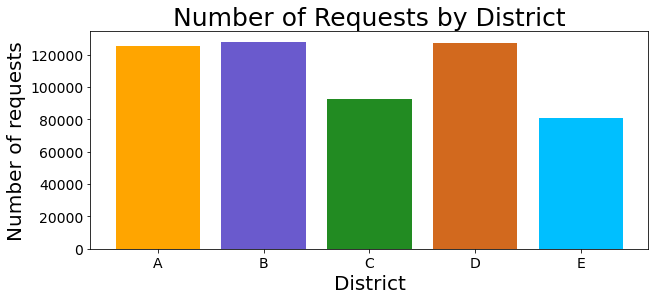

In [320]:
plt.figure(figsize = (10,4))
plt.bar(dist_count.dist,dist_count.id, color = ['orange', 'slateblue', 'forestgreen', 'chocolate', 'deepskyblue'])
plt.xlabel('District', fontsize = 20, color = 'black')
plt.xticks(fontsize = 14, color = 'black')
plt.ylabel('Number of requests', fontsize = 20, color = 'black')
plt.yticks(fontsize = 14, color = 'black')
plt.title('Number of Requests by District', fontsize = 25, color = 'black')
plt.show()